In [1]:
from src.utils.utils import *
# Standard library imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib

# 加载经验数据
print("Loading empirical data...")
w_media_empirical = pd.read_csv('./new_output/empirical/w_media_risk_data_7days.csv')
o_people_empirical = pd.read_csv('./new_output/empirical/sentiment_data_7days.csv')
m_media_empirical = pd.read_csv('./new_output/empirical/m_media_risk_data_7days.csv')

# 创建经验数据字典
emp_w_risk_p = dict(zip(w_media_empirical['period_id_3d'], w_media_empirical['risk_p']))
emp_m_risk_p = dict(zip(m_media_empirical['period_id_3d'], m_media_empirical['risk_p']))
emp_sentiment_high_p = dict(zip(o_people_empirical['period_id_3d'], o_people_empirical['high_p']))
emp_sentiment_middle_p = dict(zip(o_people_empirical['period_id_3d'], o_people_empirical['middle_p']))
emp_sentiment_low_p = dict(zip(o_people_empirical['period_id_3d'], o_people_empirical['low_p']))

empirical_data = {
    'w_risk_p': emp_w_risk_p,
    'm_risk_p': emp_m_risk_p,
    'sentiment_high_p': emp_sentiment_high_p,
    'sentiment_middle_p': emp_sentiment_middle_p,
    'sentiment_low_p': emp_sentiment_low_p
}

from src.modules import *
print("Loading network...")
network = joblib.load('networks/simple_all_new.pkl')

# 设置随机种子确保可重复性
np.random.seed(42)
import pickle
import pandas as pd
with open('abc_results/abc_results.pkl', 'rb') as f:
    abc_results = pickle.load(f)
with open('abc_results/abc_results_second.pkl', 'rb') as f:
    abc_results_second = pickle.load(f)
best_params = abc_results['best_params']
from src.ABC import analyze_results
top_results = analyze_results(abc_results, top_n=200)

Loading empirical data...
Loading network...

=== Top 200 Parameter Combinations Analysis ===
Error Range: [0.1253, 0.1271]
Mean Error: 0.1267 ± 0.0004

Parameter Distributions:

ALPHA Distribution:
Range: [1.824, 93.460]
Mean ± Std: 37.005 ± 21.256
IQR: [20.335, 50.794]

BETA Distribution:
Range: [0.766, 0.900]
Mean ± Std: 0.831 ± 0.026
IQR: [0.810, 0.849]

THETA Distribution:
Range: [0.010, 0.010]
Mean ± Std: 0.010 ± 0.000
IQR: [0.010, 0.010]

SIGMA Distribution:
Range: [0.010, 89.559]
Mean ± Std: 15.964 ± 20.145
IQR: [0.010, 27.545]

ZETA Distribution:
Range: [0.516, 0.642]
Mean ± Std: 0.577 ± 0.021
IQR: [0.565, 0.590]

MIU Distribution:
Range: [0.000, 1.000]
Mean ± Std: 0.479 ± 0.316
IQR: [0.217, 0.781]

G_M Distribution:
Range: [0.010, 190.198]
Mean ± Std: 94.059 ± 37.261
IQR: [65.885, 116.982]


In [5]:
min_errors = []
mean_errors = []
for item in abc_results_first['stats']:
    min_errors.append(item['min_error'])
    mean_errors.append(item['mean_error'])

C:\Users\wujlin\AppData\Local\Temp\ipykernel_13608\3286155934.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


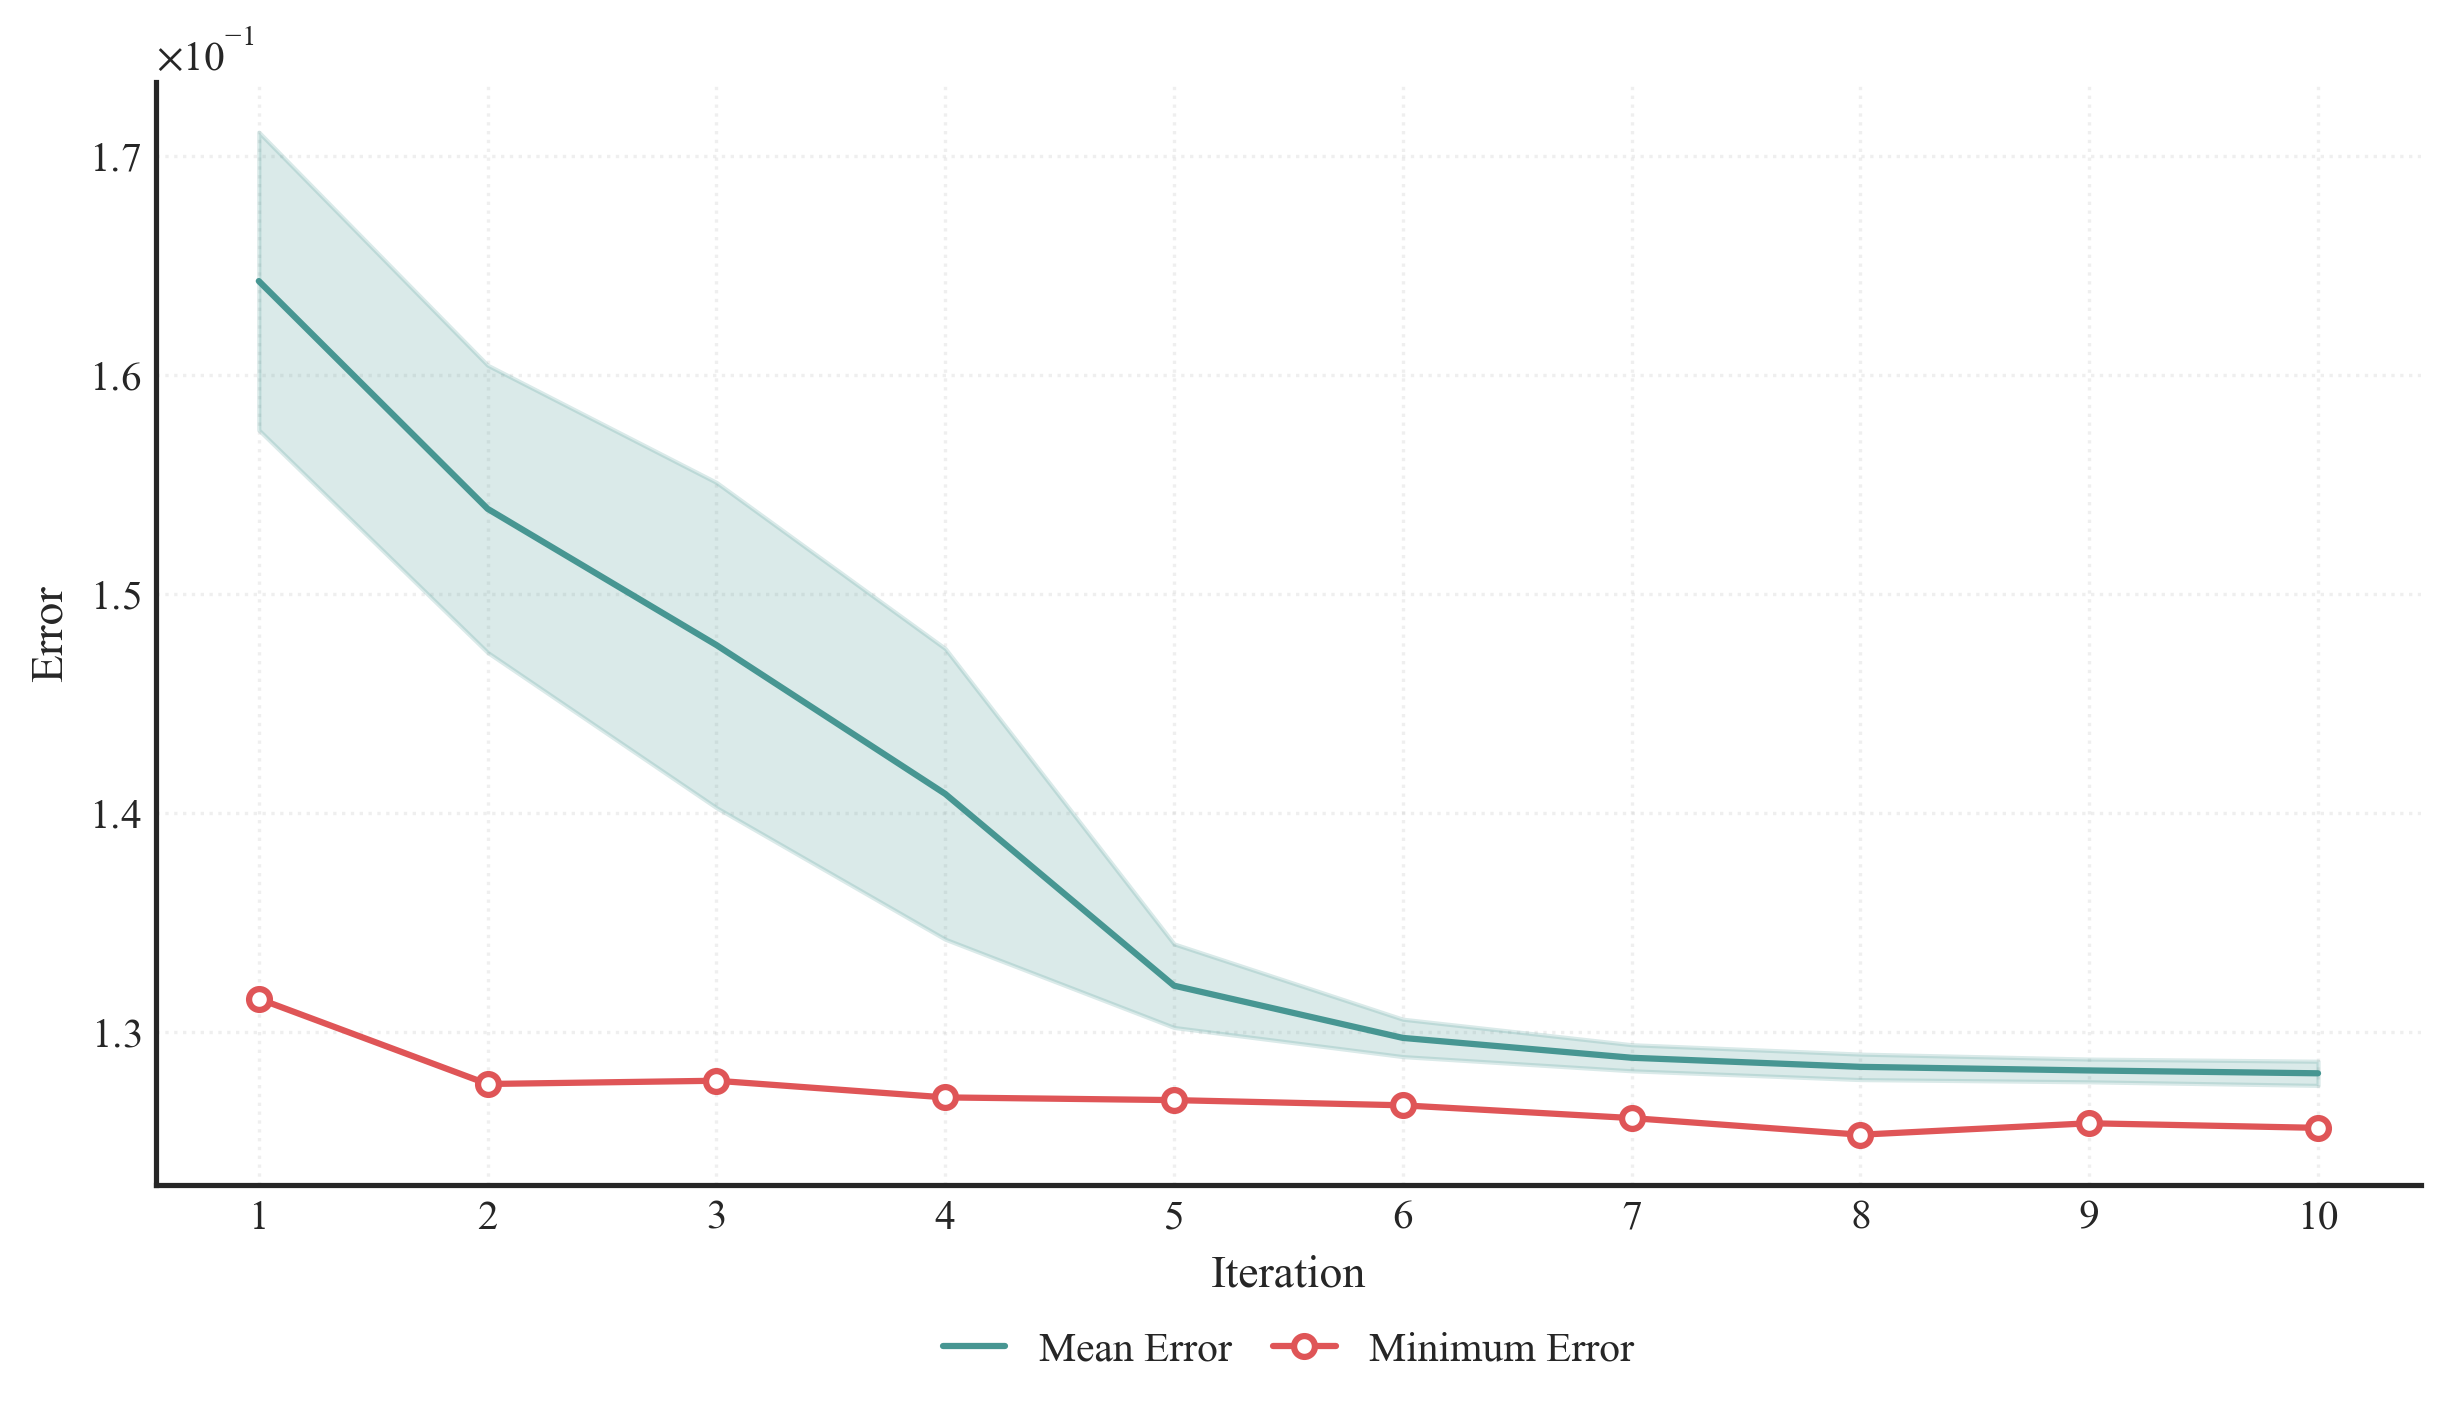

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# 设置可视化参数
SMALL_SIZE = 10  # 增大基础字号
MEDIUM_SIZE = 11
BIGGER_SIZE = 12
GRID_ALPHA = 0.3
GRID_STYLE = ':'

# 设置图形风格
plt.style.use('seaborn-white')
plt.rcParams.update({
    'font.family': 'Times New Roman',
    'font.size': SMALL_SIZE,
    'axes.titlesize': MEDIUM_SIZE,
    'axes.labelsize': MEDIUM_SIZE,
    'xtick.labelsize': SMALL_SIZE,
    'ytick.labelsize': SMALL_SIZE,
    'legend.fontsize': SMALL_SIZE,
    'mathtext.fontset': 'stix'  # 确保数学符号也使用Times New Roman风格
})

# 创建图形
fig, ax = plt.subplots(figsize=(8.27, 5), dpi=300)

# 处理误差数据
iterations = range(1, len(abc_results['all_errors']) + 1)
mean_errors = [np.mean(errors) for errors in abc_results['all_errors']]
min_errors = [np.min(errors) for errors in abc_results['all_errors']]

# 绘制平均误差
ax.plot(iterations, mean_errors, 
        color='#479692',
        label='Mean Error', 
        lw=1.5)  # 增加线宽

# 绘制最小误差
ax.plot(iterations, min_errors, 
        color='#DF5557', 
        label='Minimum Error', 
        lw=1.5,
        marker='o',        # 添加标记点
        markersize=5,      # 设置标记大小
        markerfacecolor='white',  # 标记点填充色
        markeredgewidth=1.5)      # 标记点边框宽度

# 添加误差区域
std_errors = [np.std(errors) for errors in abc_results['all_errors']]
ax.fill_between(iterations, 
                np.array(mean_errors) - np.array(std_errors),
                np.array(mean_errors) + np.array(std_errors),
                color='#479692', 
                alpha=0.2)

# 设置坐标轴
ax.set_xlabel('Iteration')
ax.set_ylabel('Error')
ax.set_xticks(iterations)

# 设置y轴格式
ax.yaxis.set_major_formatter(plt.ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

# 移除顶部和右侧边框
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# 添加网格
ax.grid(True, alpha=GRID_ALPHA, linestyle=GRID_STYLE)

# 添加图例
ax.legend(bbox_to_anchor=(0.5, -0.15), 
         loc='center', 
         frameon=False,
         ncol=2,
         columnspacing=1.0,
         handlelength=1.5)

# 调整布局
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)

plt.show()

In [4]:
# 加载网络
from src.modules import *
print("Loading network...")
network = joblib.load('networks/simple_all_new.pkl')
# 在运行模拟之前设置属性
setattr(network, 't', 0)
setattr(network, 'history', [])
print("Network loaded successfully")

# 运行模拟
print("Starting simulation...")
history = network.simulate_steps(
    steps=91,
    **best_params
)
print("Simulation completed")

Loading network...
Network loaded successfully
Starting simulation...
Simulation completed


In [16]:
# 计算误差
print("\nCalculating errors...")
error_for_sentiment_high = 0
error_for_sentiment_middle = 0
error_for_sentiment_low = 0
error_for_w_risk = 0
error_for_m_risk = 0

# 计算前14个时间步的误差
for i in range(14):
    if i in emp_sentiment_high_p:
        error_for_sentiment_high += abs(emp_sentiment_high_p[i] - history[i*7]['o_people']['H'])
    if i in emp_sentiment_middle_p:
        error_for_sentiment_middle += abs(emp_sentiment_middle_p[i] - history[i*7]['o_people']['M'])
    if i in emp_sentiment_low_p:
        error_for_sentiment_low += abs(emp_sentiment_low_p[i] - history[i*7]['o_people']['L'])
    if i in emp_w_risk_p:
        error_for_w_risk += abs(emp_w_risk_p[i] - history[i*7]['w_media']['R'])
    if i in emp_m_risk_p:
        error_for_m_risk += abs(emp_m_risk_p[i] - history[i*7]['m_media']['R'])

# 打印误差结果
print("\nAverage Errors:")
print(f"Sentiment High: {error_for_sentiment_high/14:.4f}")
print(f"Sentiment Middle: {error_for_sentiment_middle/14:.4f}")
print(f"Sentiment Low: {error_for_sentiment_low/14:.4f}")
print(f"We-media Risk: {error_for_w_risk/14:.4f}")
print(f"Mainstream Media Risk: {error_for_m_risk/14:.4f}")


Calculating errors...

Average Errors:
Sentiment High: 0.0453
Sentiment Middle: 0.0439
Sentiment Low: 0.0569
We-media Risk: 0.1172
Mainstream Media Risk: 0.1758


In [5]:
# 计算误差
print("\nCalculating errors...")
error_for_sentiment_high = 0
error_for_sentiment_middle = 0
error_for_sentiment_low = 0
error_for_w_risk = 0
error_for_m_risk = 0

# 计算前14个时间步的误差
for i in range(14):
    if i in emp_sentiment_high_p:
        error_for_sentiment_high += abs(emp_sentiment_high_p[i] - history[i*7]['o_people']['H'])
    if i in emp_sentiment_middle_p:
        error_for_sentiment_middle += abs(emp_sentiment_middle_p[i] - history[i*7]['o_people']['M'])
    if i in emp_sentiment_low_p:
        error_for_sentiment_low += abs(emp_sentiment_low_p[i] - history[i*7]['o_people']['L'])
    if i in emp_w_risk_p:
        error_for_w_risk += abs(emp_w_risk_p[i] - history[i*7]['w_media']['R'])
    if i in emp_m_risk_p:
        error_for_m_risk += abs(emp_m_risk_p[i] - history[i*7]['m_media']['R'])

# 打印误差结果
print("\nAverage Errors:")
print(f"Sentiment High: {error_for_sentiment_high/14:.4f}")
print(f"Sentiment Middle: {error_for_sentiment_middle/14:.4f}")
print(f"Sentiment Low: {error_for_sentiment_low/14:.4f}")
print(f"We-media Risk: {error_for_w_risk/14:.4f}")
print(f"Mainstream Media Risk: {error_for_m_risk/14:.4f}")


Calculating errors...

Average Errors:
Sentiment High: 0.0510
Sentiment Middle: 0.0415
Sentiment Low: 0.0503
We-media Risk: 0.1187
Mainstream Media Risk: 0.1873


In [7]:
# 提取数据
o_people_data = {
    'H': [step['o_people']['H'] for step in history],
    'M': [step['o_people']['M'] for step in history],
    'L': [step['o_people']['L'] for step in history]
}

m_media_data = {
    'R': [step['m_media']['R'] for step in history]
}

w_media_data = {
    'R': [step['w_media']['R'] for step in history]
}

C:\Users\wujlin\AppData\Local\Temp\ipykernel_13608\4072361272.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


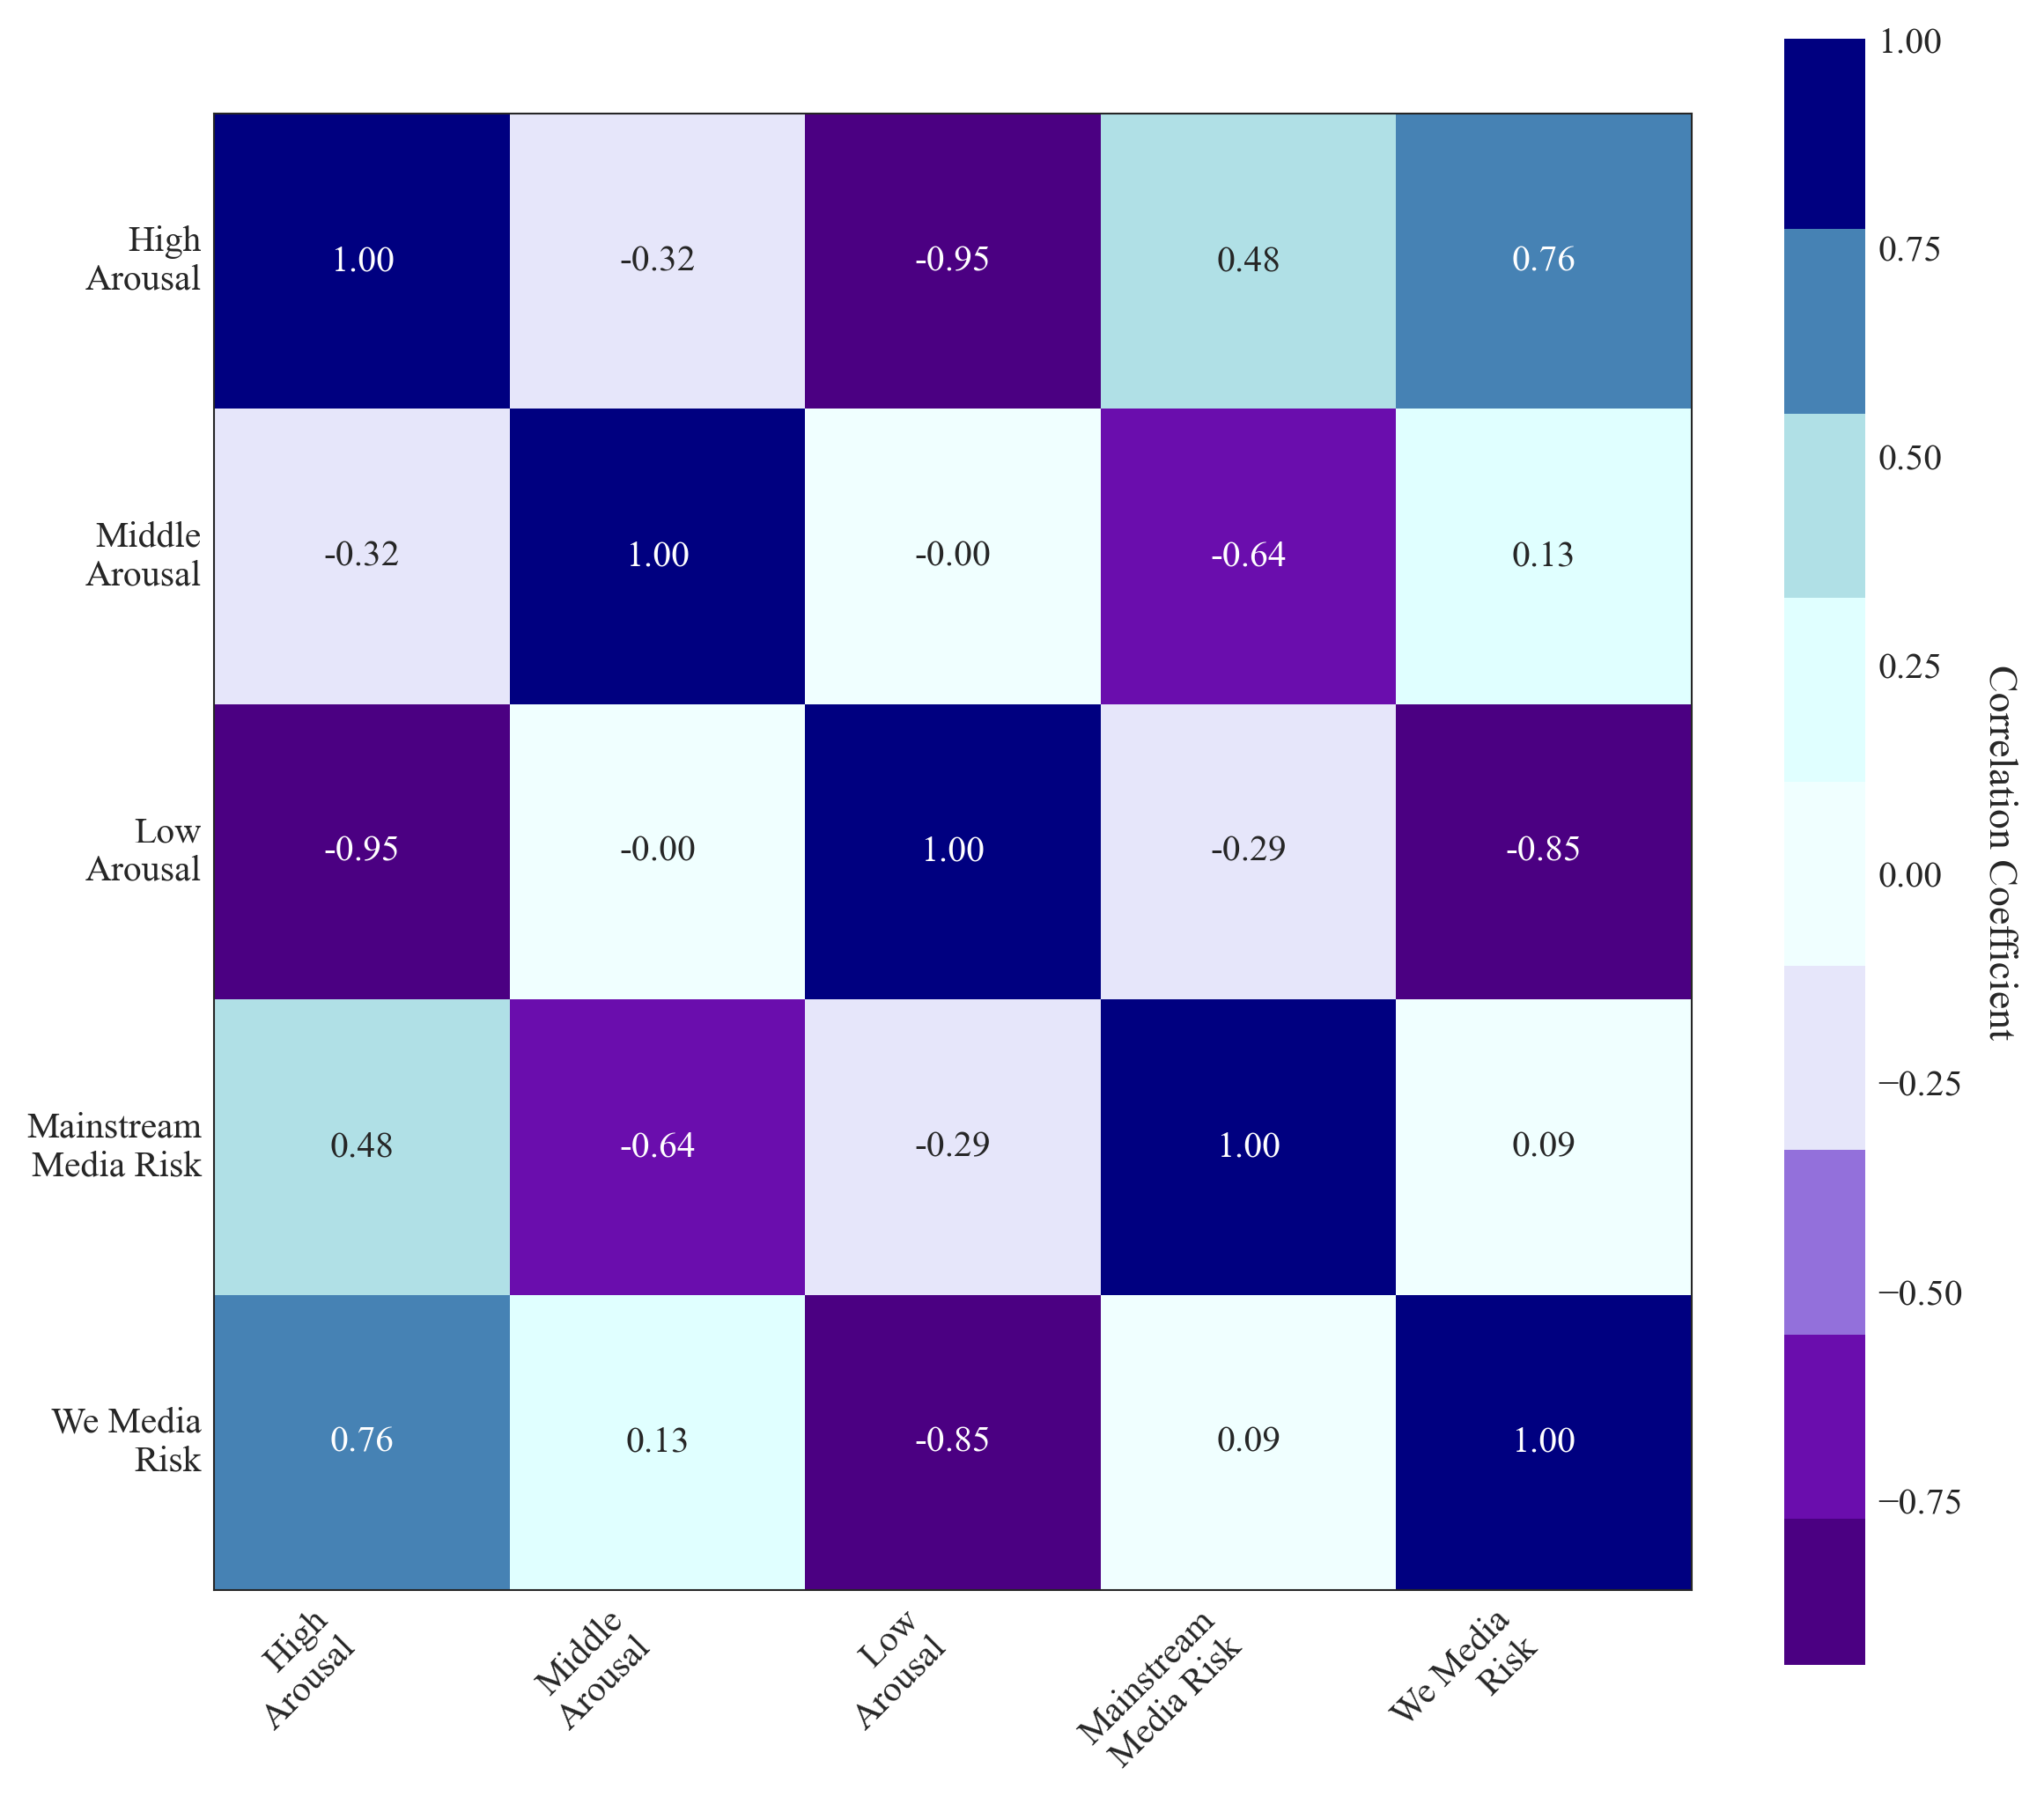

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# 设置可视化参数
SMALL_SIZE = 10
MEDIUM_SIZE = 11
BIGGER_SIZE = 12

# 设置图形风格
plt.style.use('seaborn-white')
plt.rcParams.update({
    'font.family': 'Times New Roman',
    'font.size': SMALL_SIZE,
    'axes.titlesize': MEDIUM_SIZE,
    'axes.labelsize': MEDIUM_SIZE,
    'xtick.labelsize': SMALL_SIZE,
    'ytick.labelsize': SMALL_SIZE,
    'legend.fontsize': SMALL_SIZE,
    'mathtext.fontset': 'stix'
})

# 提取数据并计算相关性
variables = ['H', 'M', 'L', 'M_Risk', 'W_Risk']
data = {
    'H': [step['o_people']['H'] for step in history],
    'M': [step['o_people']['M'] for step in history],
    'L': [step['o_people']['L'] for step in history],
    'M_Risk': [step['m_media']['R'] for step in history],
    'W_Risk': [step['w_media']['R'] for step in history]
}

# 转换为numpy数组并计算相关性
data_array = np.array([data[var] for var in variables]).T
corr_matrix = np.corrcoef(data_array.T)

# 创建图形
fig, ax = plt.subplots(figsize=(8, 7), dpi=300)

# 创建自定义配色方案 - 方案1：优雅的紫青配色
colors = ["#4B0082", "#6A0DAD", "#9370DB", "#E6E6FA", "#F0FFFF", 
          "#E0FFFF", "#B0E0E6", "#4682B4", "#000080"]
custom_cmap = sns.color_palette(colors, as_cmap=True)

# 方案2：深绿到金色的过渡（取消注释使用）
# colors = ["#1A472A", "#2A623D", "#5C8374", "#97B3A6", "#FFE5D9",
#          "#FFB563", "#FF9636", "#FF7000", "#FF4D00"]
# custom_cmap = sns.color_palette(colors, as_cmap=True)

# 绘制热力图
im = sns.heatmap(corr_matrix,
                 xticklabels=['High\nArousal', 'Middle\nArousal', 'Low\nArousal', 
                             'Mainstream\nMedia Risk', 'We Media\nRisk'],
                 yticklabels=['High\nArousal', 'Middle\nArousal', 'Low\nArousal', 
                             'Mainstream\nMedia Risk', 'We Media\nRisk'],
                 cmap=custom_cmap,  # 使用自定义配色
                 center=0,
                 square=True,
                 annot=True,
                 fmt='.2f',
                 annot_kws={'size': SMALL_SIZE, 'family': 'Times New Roman'},
                 cbar_kws={'label': 'Correlation Coefficient'})

# 调整坐标轴标签
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# 设置colorbar的字体
cbar = im.collections[0].colorbar
cbar.ax.tick_params(labelsize=SMALL_SIZE)
cbar.ax.set_ylabel('Correlation Coefficient', 
                   fontsize=MEDIUM_SIZE, 
                   fontfamily='Times New Roman',
                   rotation=270,
                   labelpad=15)

# 添加边框
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(0.5)
    
# 调整布局
plt.tight_layout()

plt.show()

C:\Users\wujlin\AppData\Local\Temp\ipykernel_8072\3335177207.py:23: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


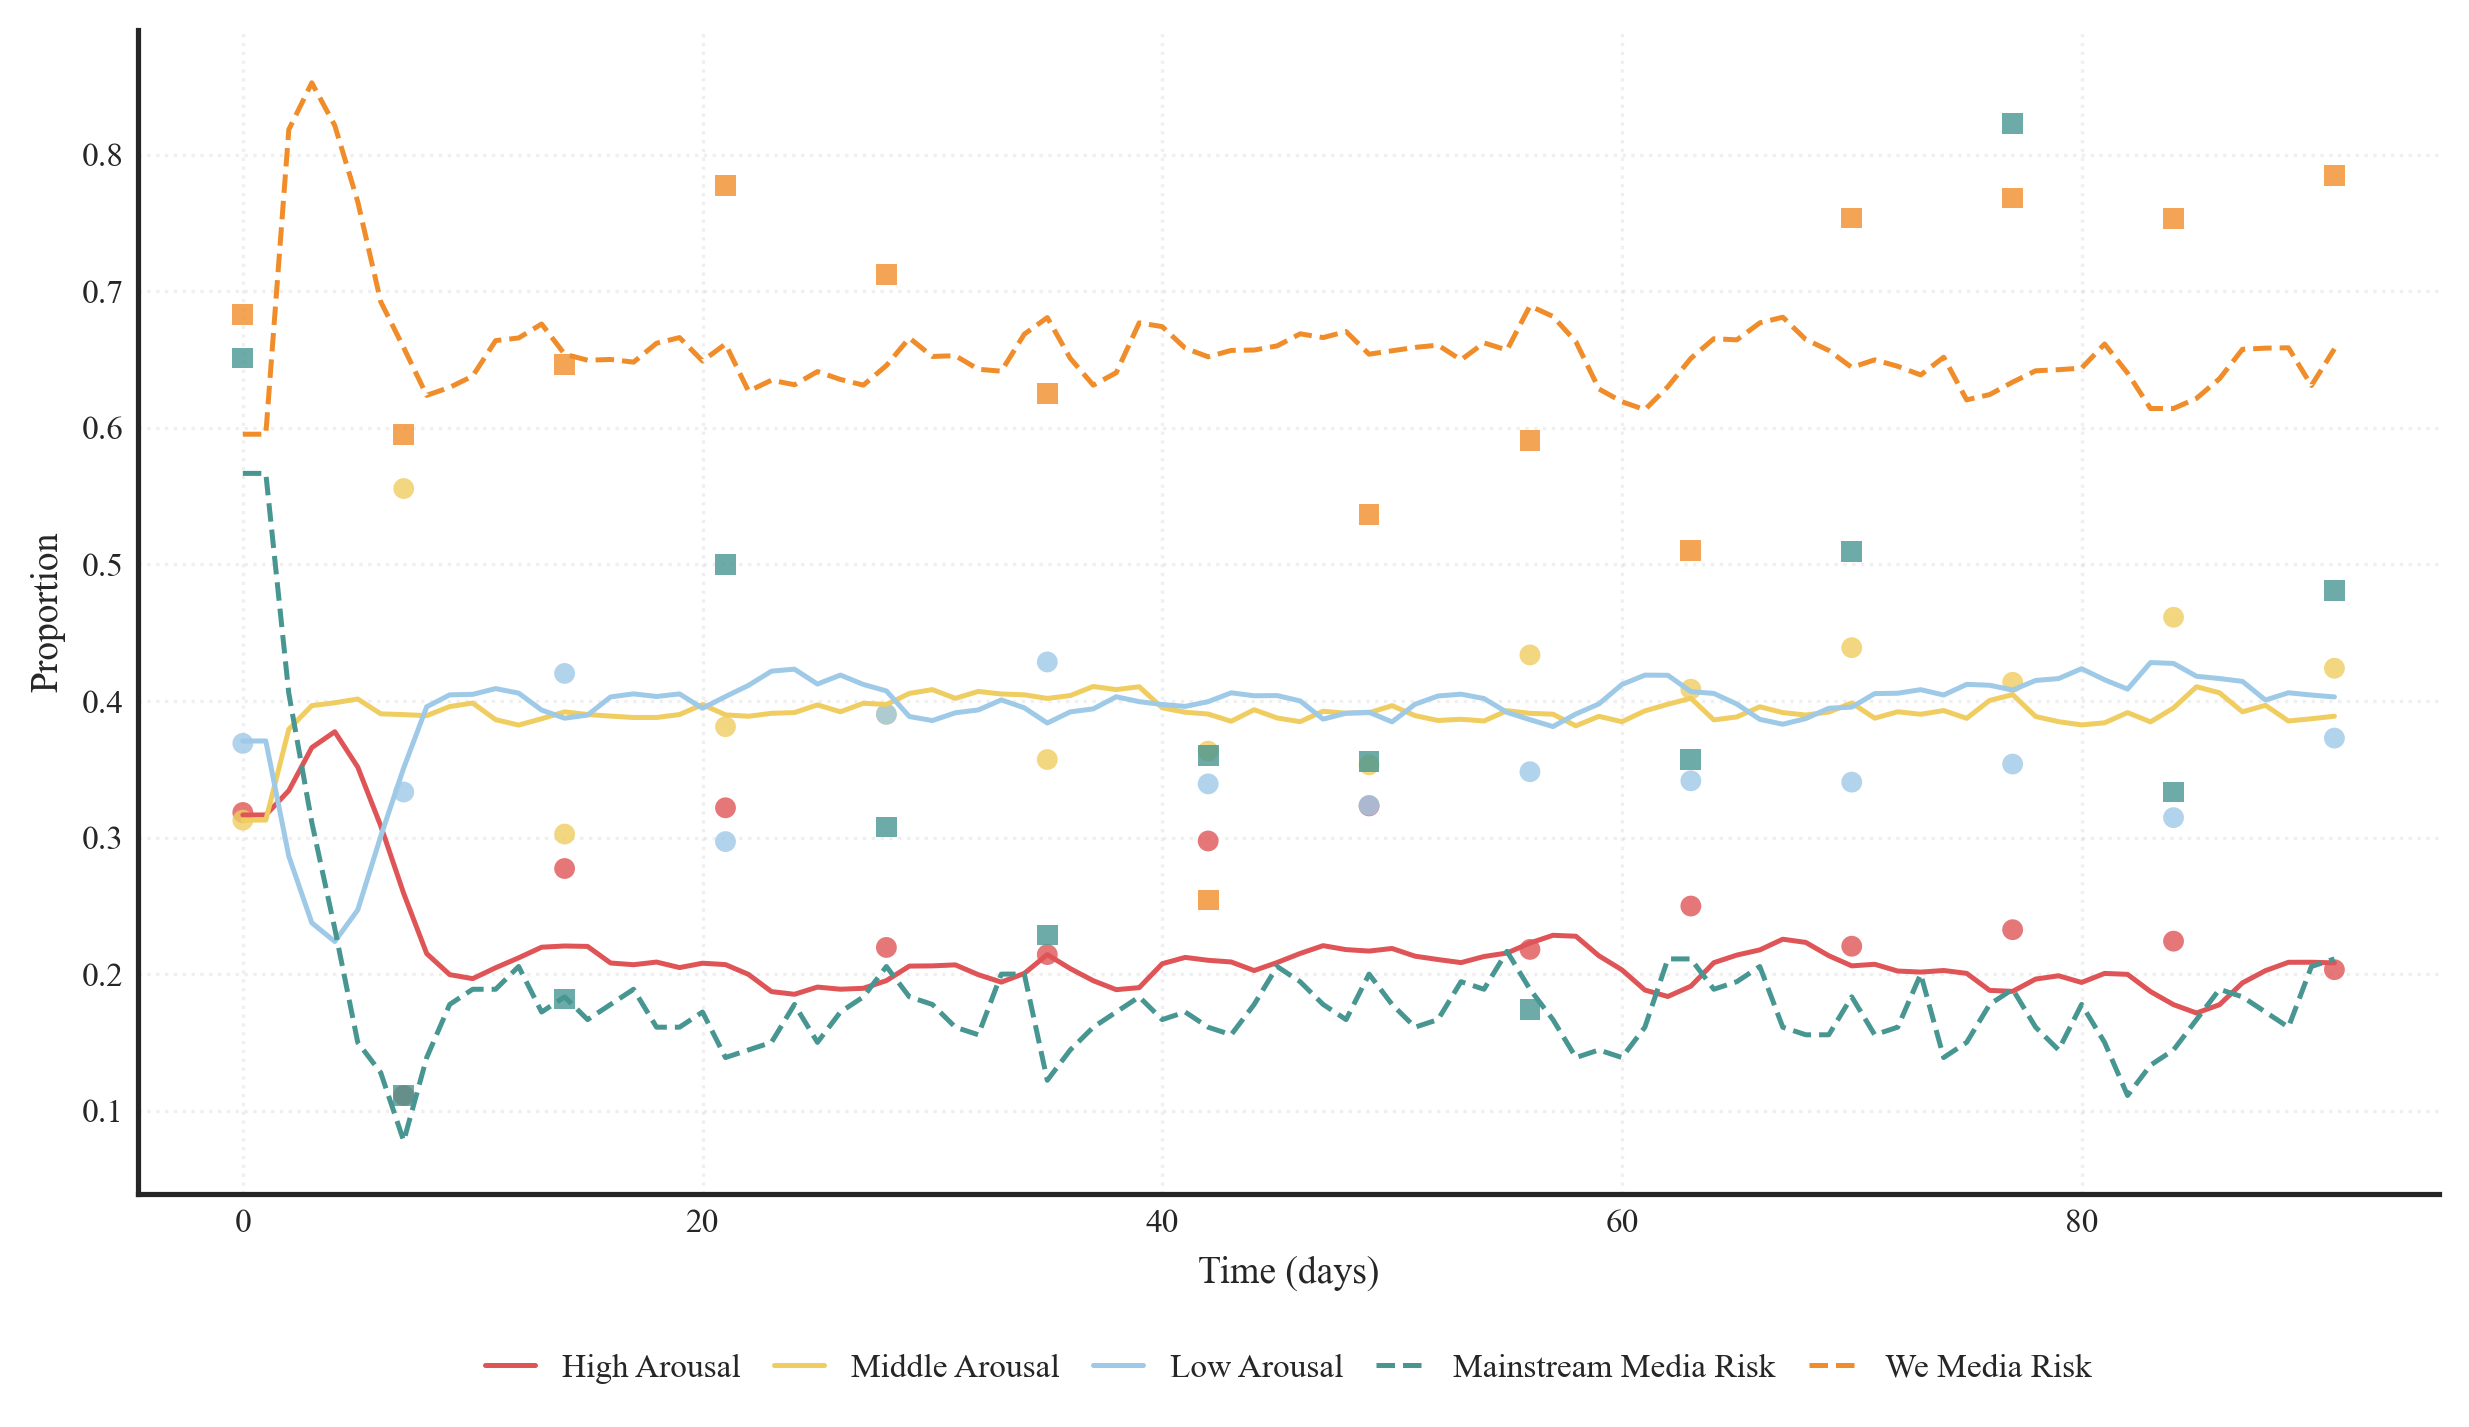

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# 设置可视化参数
SMALL_SIZE = 8
MEDIUM_SIZE = 9
BIGGER_SIZE = 10
SCATTER_SIZE = 25
SCATTER_ALPHA = 0.8
GRID_ALPHA = 0.3
GRID_STYLE = ':'

# 颜色方案
COLOR_PALETTE = {
    'high': '#DF5557',    # 红色
    'middle': '#EFCD61',  # 黄色
    'low': '#9EC9E7',     # 蓝色
    'risk': '#479692',    # 青绿色
    'no_risk': '#F08D2A'  # 橙色
}

# 设置图形风格
plt.style.use('seaborn-white')
plt.rcParams.update({
    'font.family': 'Times New Roman',
    'font.size': SMALL_SIZE,
    'axes.titlesize': MEDIUM_SIZE,
    'axes.labelsize': MEDIUM_SIZE,
    'xtick.labelsize': SMALL_SIZE,
    'ytick.labelsize': SMALL_SIZE,
    'legend.fontsize': SMALL_SIZE
})

# 创建图形和子图
fig, ax = plt.subplots(figsize=(8.27, 5), dpi=300)

# 准备时间数据
time_steps = range(len(history))


# 绘制情感状态 (实线)
sentiment_configs = [
    ('H', COLOR_PALETTE['high'], 'high'),
    ('M', COLOR_PALETTE['middle'], 'middle'),
    ('L', COLOR_PALETTE['low'], 'low')
]

for key, color, label in sentiment_configs:
    # 绘制情感线条
    ax.plot(time_steps, o_people_data[key], 
            color=color, label=f'{label.capitalize()} Arousal', lw=1.2)
    
    # 添加经验数据点
    if empirical_data:
        emp_data = empirical_data[f'sentiment_{label}_p']
        for i in emp_data:
            ax.scatter(i*7, emp_data[i], color=color, 
                      marker='o', s=SCATTER_SIZE, 
                      alpha=SCATTER_ALPHA, edgecolors='none')

# 绘制媒体风险状态 (虚线)
media_configs = [
    (m_media_data, COLOR_PALETTE['risk'], 'Mainstream Media Risk', 'm_risk_p'),
    (w_media_data, COLOR_PALETTE['no_risk'], 'We Media Risk', 'w_risk_p')
]

for media_data, color, label, emp_key in media_configs:
    # 绘制风险线条 (虚线)
    ax.plot(time_steps, media_data['R'], 
            color=color, label=label, 
            linestyle='--', lw=1.2)
    
    # 添加经验数据点
    if empirical_data:
        emp_data = empirical_data[emp_key]
        for i in emp_data:
            ax.scatter(i*7, emp_data[i], 
                      color=color, 
                      marker='s',  # 使用方形标记区分
                      s=SCATTER_SIZE, 
                      alpha=SCATTER_ALPHA, 
                      edgecolors='none')

# 设置图形样式
ax.set_xlabel('Time (days)')
ax.set_ylabel('Proportion')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, alpha=GRID_ALPHA, linestyle=GRID_STYLE)

# 优化图例位置和样式 - 放在底部
ax.legend(bbox_to_anchor=(0.5, -0.15), 
         loc='center', 
         frameon=False,
         ncol=5,
         columnspacing=1.0,
         handlelength=1.5)

# 调整布局
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)  # 为底部图例留出空间

plt.show()

In [10]:
from dtaidistance import dtw
import numpy as np

def compare_timeseries_dtw(sim_data, emp_data):
    # 标准化数据
    sim_norm = (sim_data - np.mean(sim_data)) / np.std(sim_data)
    emp_norm = (emp_data - np.mean(emp_data)) / np.std(emp_data)
    
    # 计算DTW距离
    distance = dtw.distance(sim_norm, emp_norm)
    return distance

from statsmodels.tsa.stattools import grangercausalitytests

def compare_timeseries_granger(sim_data, emp_data, maxlag=2):
    data = np.column_stack([sim_data, emp_data])
    gc_res = grangercausalitytests(data, maxlag=maxlag)
    return gc_res

from sklearn.metrics import mutual_info_score
import numpy as np

def compare_timeseries_mi(sim_data, emp_data, bins=10):
    # 离散化数据
    sim_bins = np.histogram(sim_data, bins=bins)[0]
    emp_bins = np.histogram(emp_data, bins=bins)[0]
    
    # 计算互信息
    mi = mutual_info_score(sim_bins, emp_bins)
    return mi

from scipy.stats import entropy
import numpy as np

def compare_timeseries_ce(sim_data, emp_data, bins=10):
    # 计算概率分布
    sim_hist = np.histogram(sim_data, bins=bins, density=True)[0]
    emp_hist = np.histogram(emp_data, bins=bins, density=True)[0]
    
    # 添加小值避免log(0)
    sim_hist = sim_hist + 1e-10
    emp_hist = emp_hist + 1e-10
    
    # 归一化
    sim_hist = sim_hist / sim_hist.sum()
    emp_hist = emp_hist / emp_hist.sum()
    
    # 计算交叉熵
    ce = entropy(emp_hist, sim_hist)
    return ce

def compare_timeseries_sliding_rmse(sim_data, emp_data, window_size=3):
    errors = []
    for i in range(len(sim_data) - window_size + 1):
        sim_window = sim_data[i:i+window_size]
        emp_window = emp_data[i:i+window_size]
        
        # 计算窗口内的RMSE
        rmse = np.sqrt(np.mean((sim_window - emp_window) ** 2))
        errors.append(rmse)
    
    return np.mean(errors)



In [11]:
# 定义变量映射
sim_emp_pairs = [
    ('o_people', 'H', 'sentiment_high_p', 'High Arousal'),
    ('o_people', 'M', 'sentiment_middle_p', 'Middle Arousal'),
    ('o_people', 'L', 'sentiment_low_p', 'Low Arousal'),
    ('m_media', 'R', 'm_risk_p', 'Mainstream Media Risk'),
    ('w_media', 'R', 'w_risk_p', 'We Media Risk')
]

# 提取经验数据的周数
weeks = sorted(list(empirical_data['m_risk_p'].keys()))


C:\Users\wujlin\AppData\Local\Temp\ipykernel_13608\2251428153.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


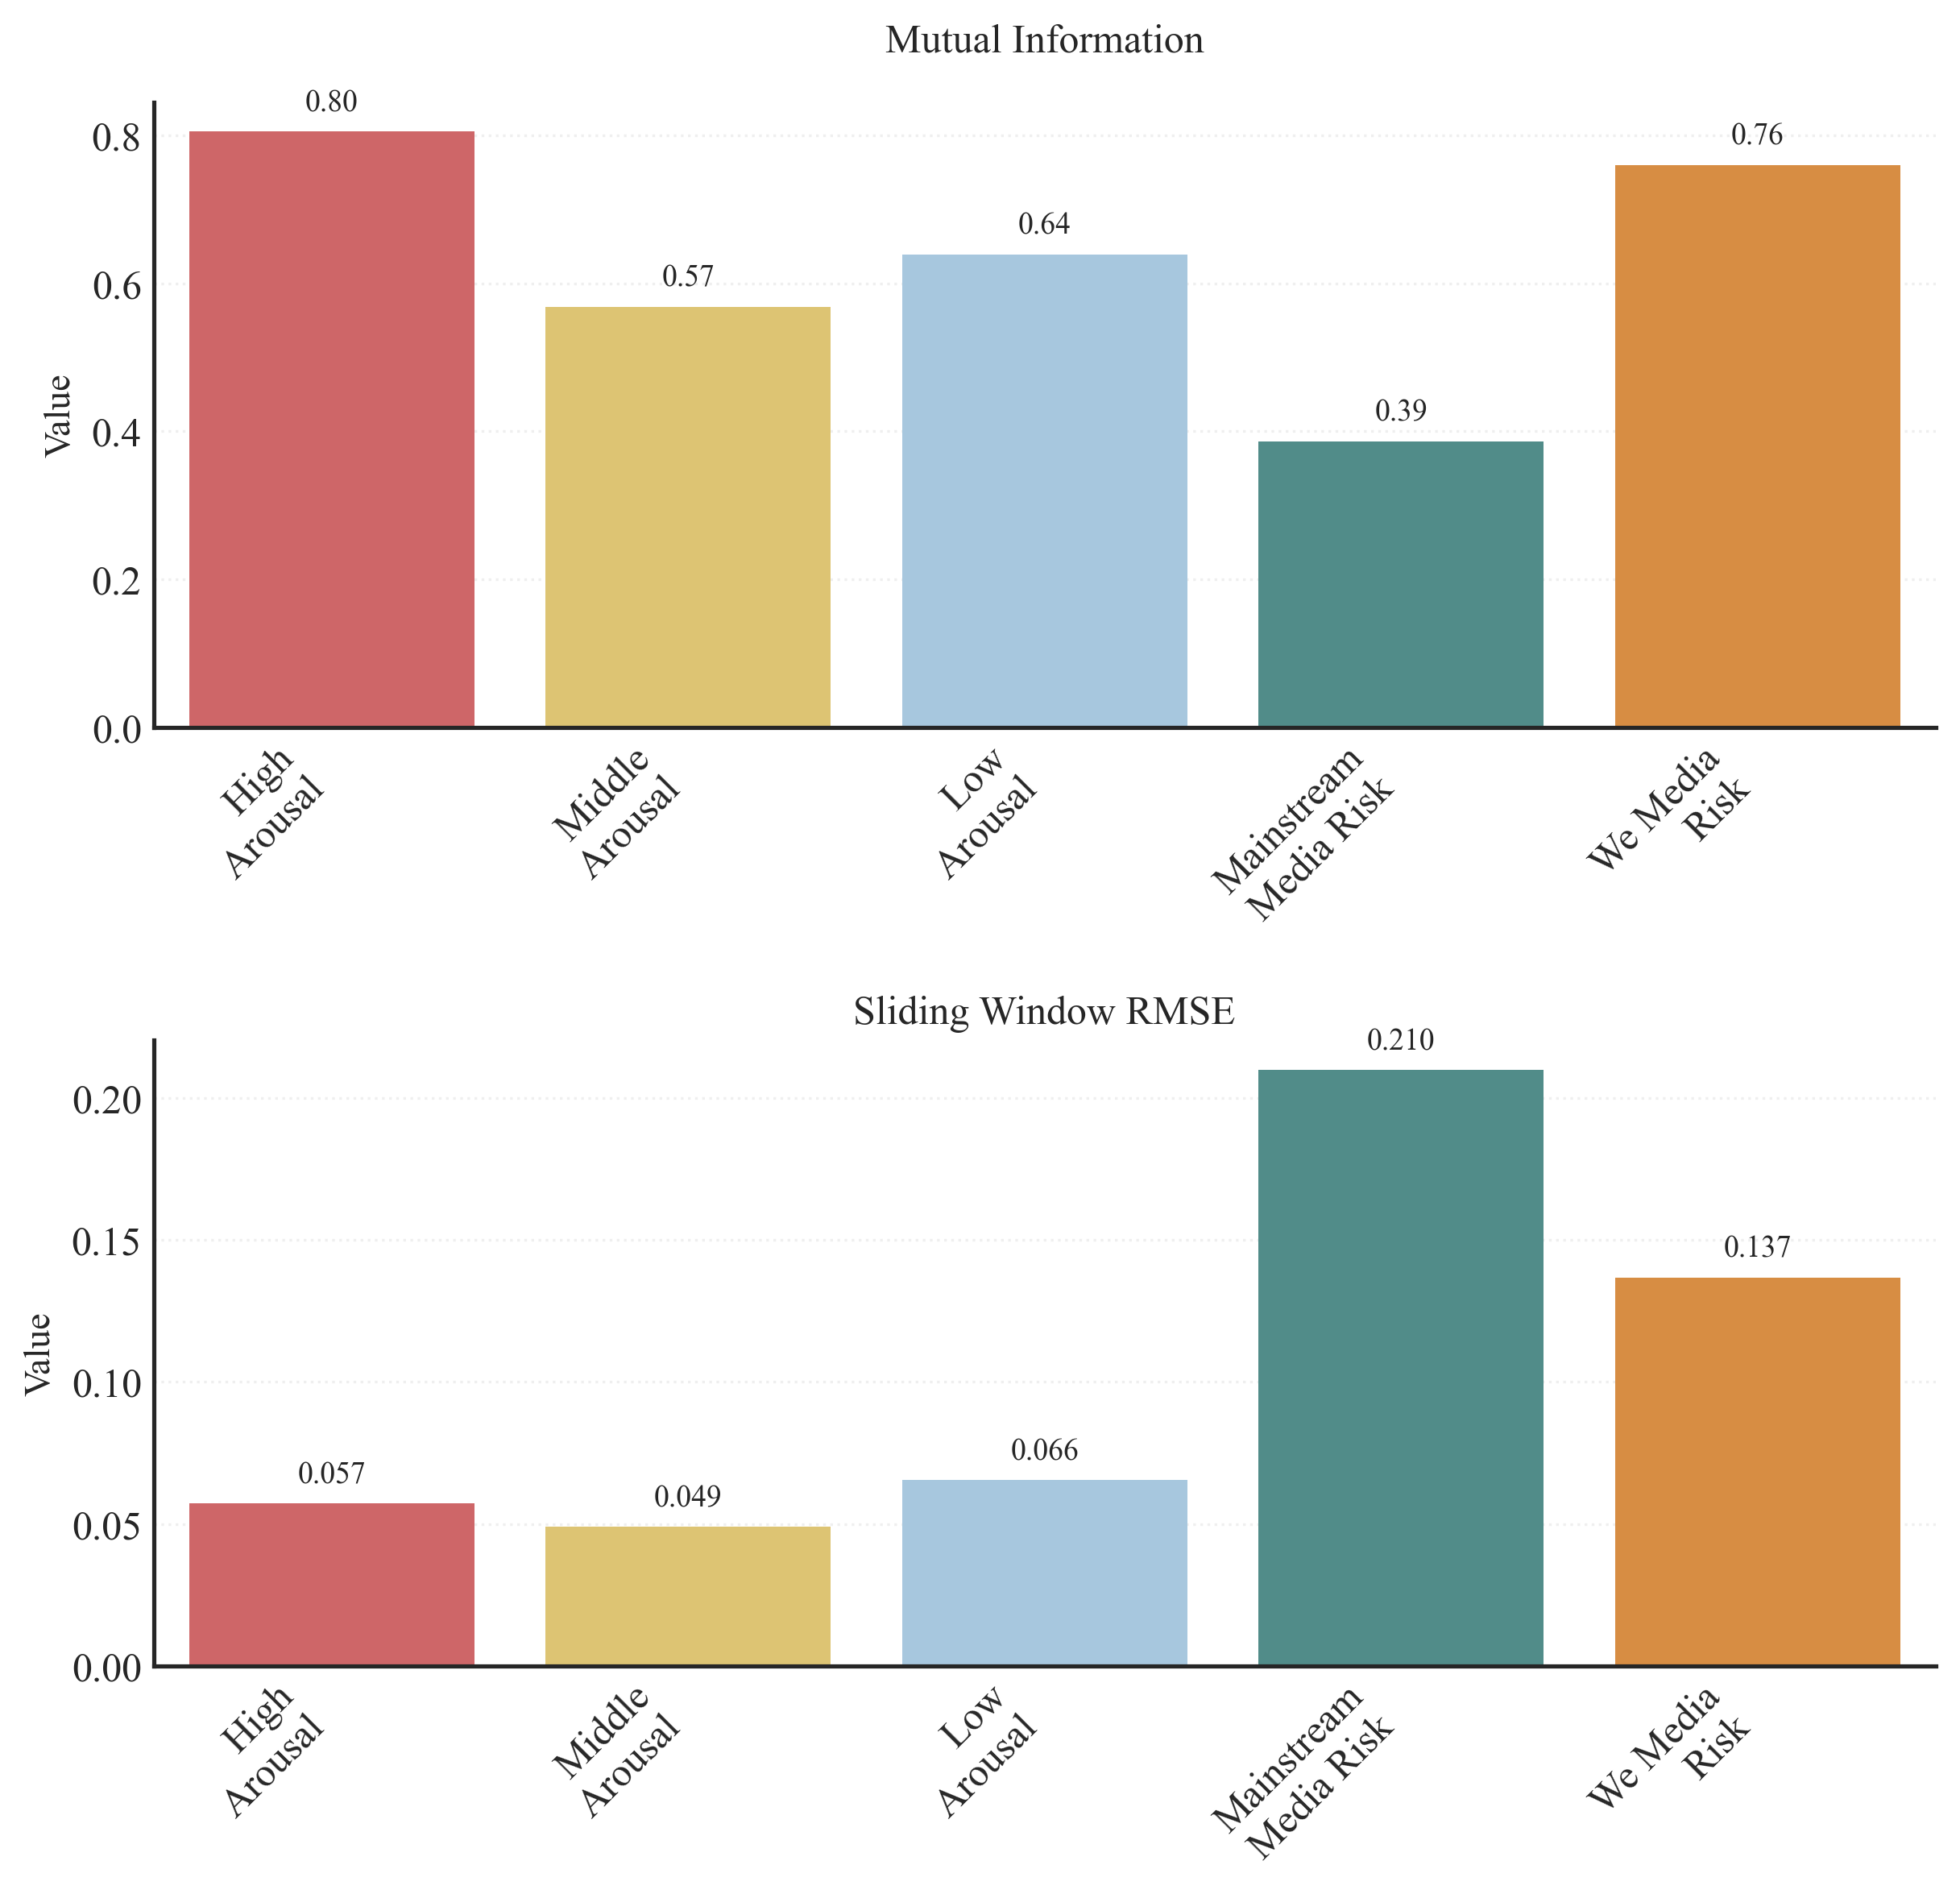

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 设置字体和样式
plt.style.use('seaborn-white')
plt.rcParams.update({
    'font.family': 'Times New Roman',
    'font.size': 12,
    'axes.titlesize': 12,
    'axes.labelsize': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'mathtext.fontset': 'stix'
})

# 创建图形 - 修改为上下布局
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8.27, 8), dpi=300)

# 数据准备
labels = ['High\nArousal', 'Middle\nArousal', 'Low\nArousal', 
          'Mainstream\nMedia Risk', 'We Media\nRisk']
colors = ['#DF5557', '#EFCD61', '#9EC9E7', '#479692', '#F08D2A']

# 计算指标
metrics = {
    'Mutual\nInformation': [],
    'RMSE': []
}

for category, state, emp_key, label in sim_emp_pairs:
    sim_data = np.array([history[week*7][category][state] for week in weeks])
    emp_data = np.array([empirical_data[emp_key][week] for week in weeks])
    
    metrics['Mutual\nInformation'].append(compare_timeseries_mi(sim_data, emp_data))
    metrics['RMSE'].append(compare_timeseries_sliding_rmse(sim_data, emp_data))

# 绘制Mutual Information
sns.barplot(x=labels, y=metrics['Mutual\nInformation'], 
            ax=ax1, palette=colors)
ax1.set_title('Mutual Information', pad=15, fontsize=12)
ax1.set_xlabel('')
ax1.set_ylabel('Value', fontsize=11)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.grid(axis='y', linestyle=':', alpha=0.3)

# 在柱子上添加数值标签
for i, v in enumerate(metrics['Mutual\nInformation']):
    ax1.text(i, v + 0.02, f'{v:.2f}', ha='center', va='bottom', 
             fontsize=9, fontfamily='Times New Roman')

# 绘制RMSE
sns.barplot(x=labels, y=metrics['RMSE'], 
            ax=ax2, palette=colors)
ax2.set_title('Sliding Window RMSE', pad=5, fontsize=12)
ax2.set_xlabel('')
ax2.set_ylabel('Value', fontsize=11)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.grid(axis='y', linestyle=':', alpha=0.3)

# 在柱子上添加数值标签
for i, v in enumerate(metrics['RMSE']):
    ax2.text(i, v + 0.005, f'{v:.3f}', ha='center', va='bottom', 
             fontsize=9, fontfamily='Times New Roman')

# 调整布局
plt.tight_layout()

# 增加子图之间的间距
plt.subplots_adjust(hspace=0.5)

plt.show()

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import gaussian_kde

# 设置字体和样式
plt.style.use('seaborn-white')
plt.rcParams.update({
    'font.family': 'Times New Roman',
    'font.size': 10,
    'axes.titlesize': 12,
    'axes.labelsize': 11,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'mathtext.fontset': 'stix'
})

# 修改参数名称映射
param_names = ['α', 'β', 'θ', 'σ', 'ζ',  'γ']
param_keys = ['alpha', 'beta', 'theta', 'sigma', 'zeta',  'g_m']  # 原始数据中的键名

# 准备数据
all_iterations = []

for iteration, particles in enumerate(abc_results_second['all_particles'], 1):
    iteration_data = {
        'Iteration': iteration,
        'α': [p['alpha'] for p in particles],
        'β': [p['beta'] for p in particles],
        'θ': [p['theta'] for p in particles],
        'σ': [p['sigma'] for p in particles],
        'ζ': [p['zeta'] for p in particles],
        # 'μ': [p['miu'] for p in particles],
        'γ': [p['g_m'] for p in particles]  # 使用g_m的数据但存为γ
    }
    df_iteration = pd.DataFrame(iteration_data)
    all_iterations.append(df_iteration)

df = pd.concat(all_iterations, ignore_index=True)

C:\Users\wujlin\AppData\Local\Temp\ipykernel_4912\34168818.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


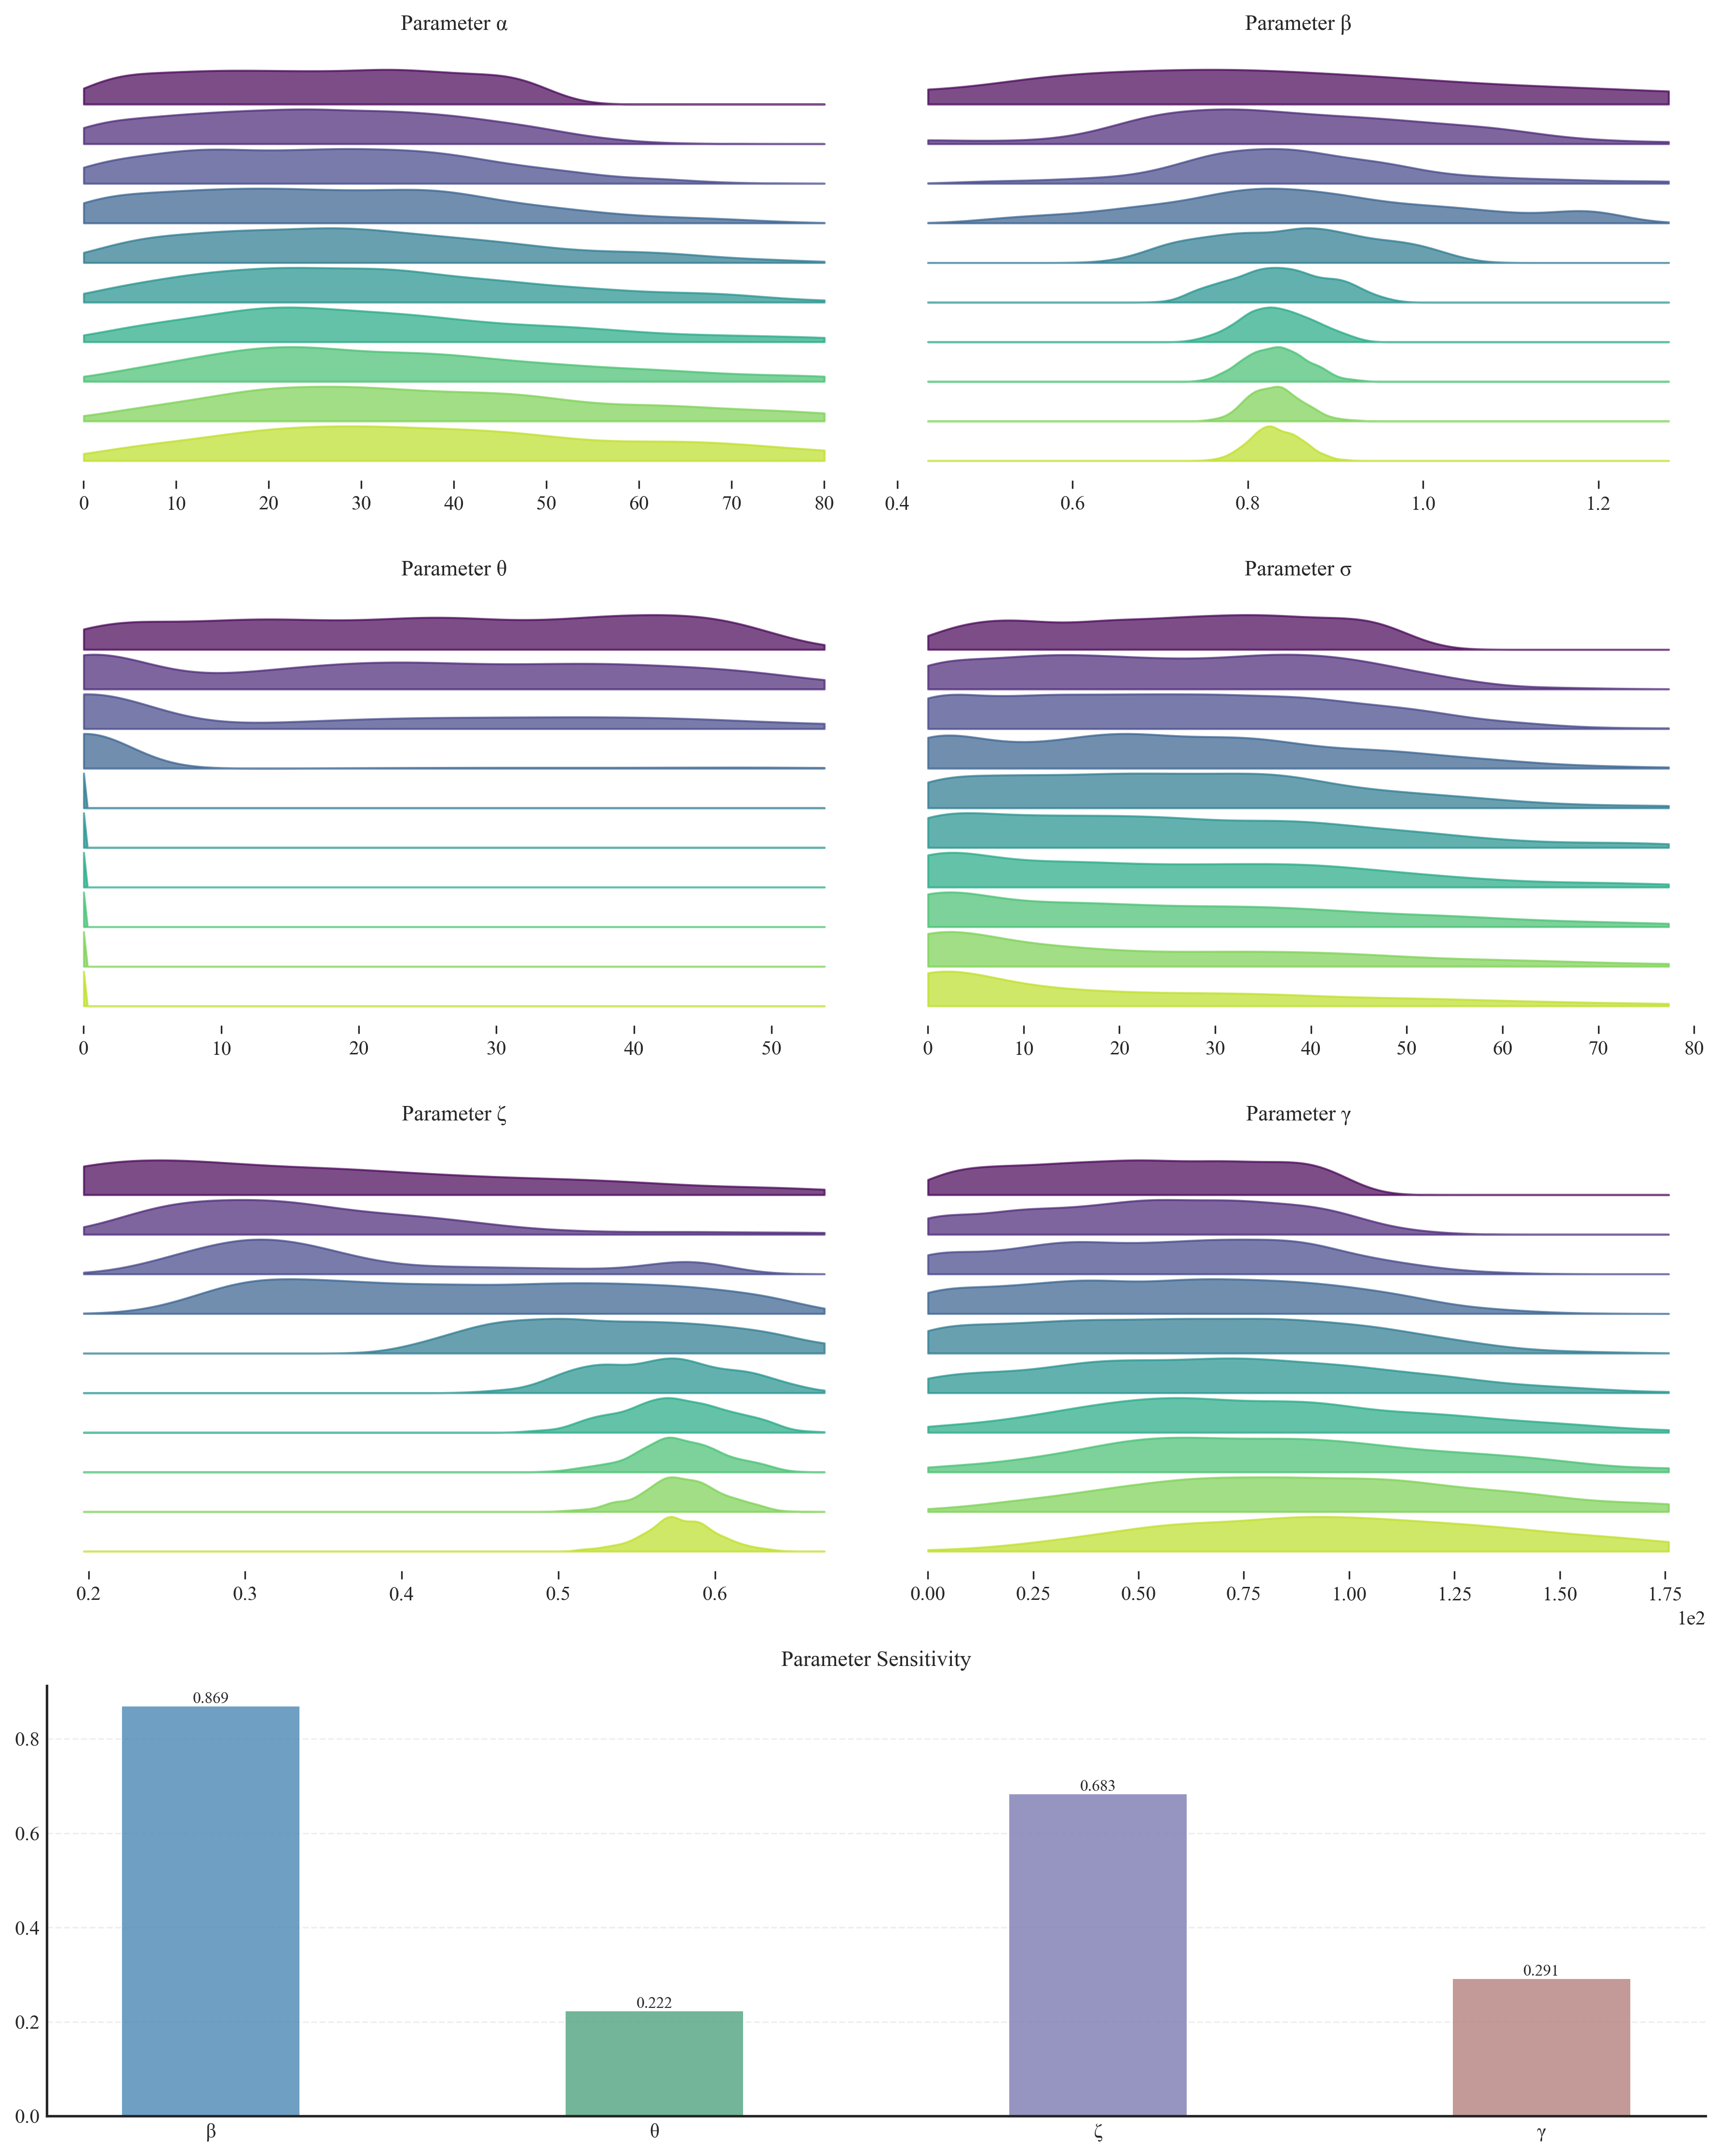

In [8]:
# 创建图形 - 使用2列布局
fig = plt.figure(figsize=(12, 15), dpi=300)

# 创建网格布局
gs = fig.add_gridspec(4, 2)

# 使用更柔和的颜色方案
colors = plt.cm.viridis(np.linspace(0, 0.9, 10))

# 为每个参数创建山脊图
param_names = ['α', 'β', 'θ', 'σ', 'ζ', 'γ']  # 移除 'μ'
for idx, param in enumerate(param_names):
    # 创建子图
    ax = fig.add_subplot(gs[idx // 2, idx % 2])
    
    param_data = []
    for i in range(1, df['Iteration'].max()+1):
        param_data.append(df[df['Iteration'] == i][param])
    
    # 计算合适的y轴范围
    all_data = np.concatenate(param_data)
    density_range = np.percentile(all_data, [1, 99])
    
    # 减少重叠，增加间距
    max_iterations = len(param_data)
    for i, data in enumerate(param_data):
        offset = (max_iterations - i - 1) * 0.4
        density = gaussian_kde(data, bw_method='scott')
        xs = np.linspace(density_range[0], density_range[1], 200)
        ys = density(xs)
        
        ax.fill_between(xs, offset, offset + ys/ys.max()*0.35,
                       alpha=0.7,
                       color=colors[i])
    
    # 优化标签和样式
    ax.set_title(f'Parameter {param}', pad=10, fontsize=11)
    ax.set_yticks([])
    ax.ticklabel_format(style='sci', axis='x', scilimits=(-2,2))
    
    # 移除边框
    for spine in ax.spines.values():
        spine.set_visible(False)
    
    # 只保留底部刻度线
    ax.tick_params(axis='x', length=4)

# 添加跨越两列的参数敏感性分析图
ax_sensitivity = fig.add_subplot(gs[3, :])  # 使用最后一行，跨越所有列
parameters = ['β', 'θ', 'ζ', 'γ']
sensitivities = [0.8692, 0.2220, 0.6830, 0.2907]

# 使用优雅的配色方案
bar_colors = ['#4B88B5', '#50A37E', '#7C7BB3', '#B5817D']

# 创建柱状图
x = np.arange(len(parameters))
width = 0.4  # 稍微减小宽度使得在更宽的图中保持适当比例
bars = ax_sensitivity.bar(x, sensitivities, width, color=bar_colors, alpha=0.8)

# 设置标题和标签
ax_sensitivity.set_title('Parameter Sensitivity', pad=10, fontsize=11)
ax_sensitivity.set_xticks(x)
ax_sensitivity.set_xticklabels(parameters)

# 添加网格线
ax_sensitivity.grid(True, axis='y', linestyle='--', alpha=0.3)

# 移除右边和顶部边框
ax_sensitivity.spines['top'].set_visible(False)
ax_sensitivity.spines['right'].set_visible(False)

# 为柱状图添加数值标签
for bar in bars:
    height = bar.get_height()
    ax_sensitivity.text(bar.get_x() + bar.get_width()/2., height,
                       f'{height:.3f}',
                       ha='center', va='bottom', fontsize=8)

# 调整布局
plt.tight_layout()

plt.show()

C:\Users\wujlin\AppData\Local\Temp\ipykernel_18680\2982649033.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


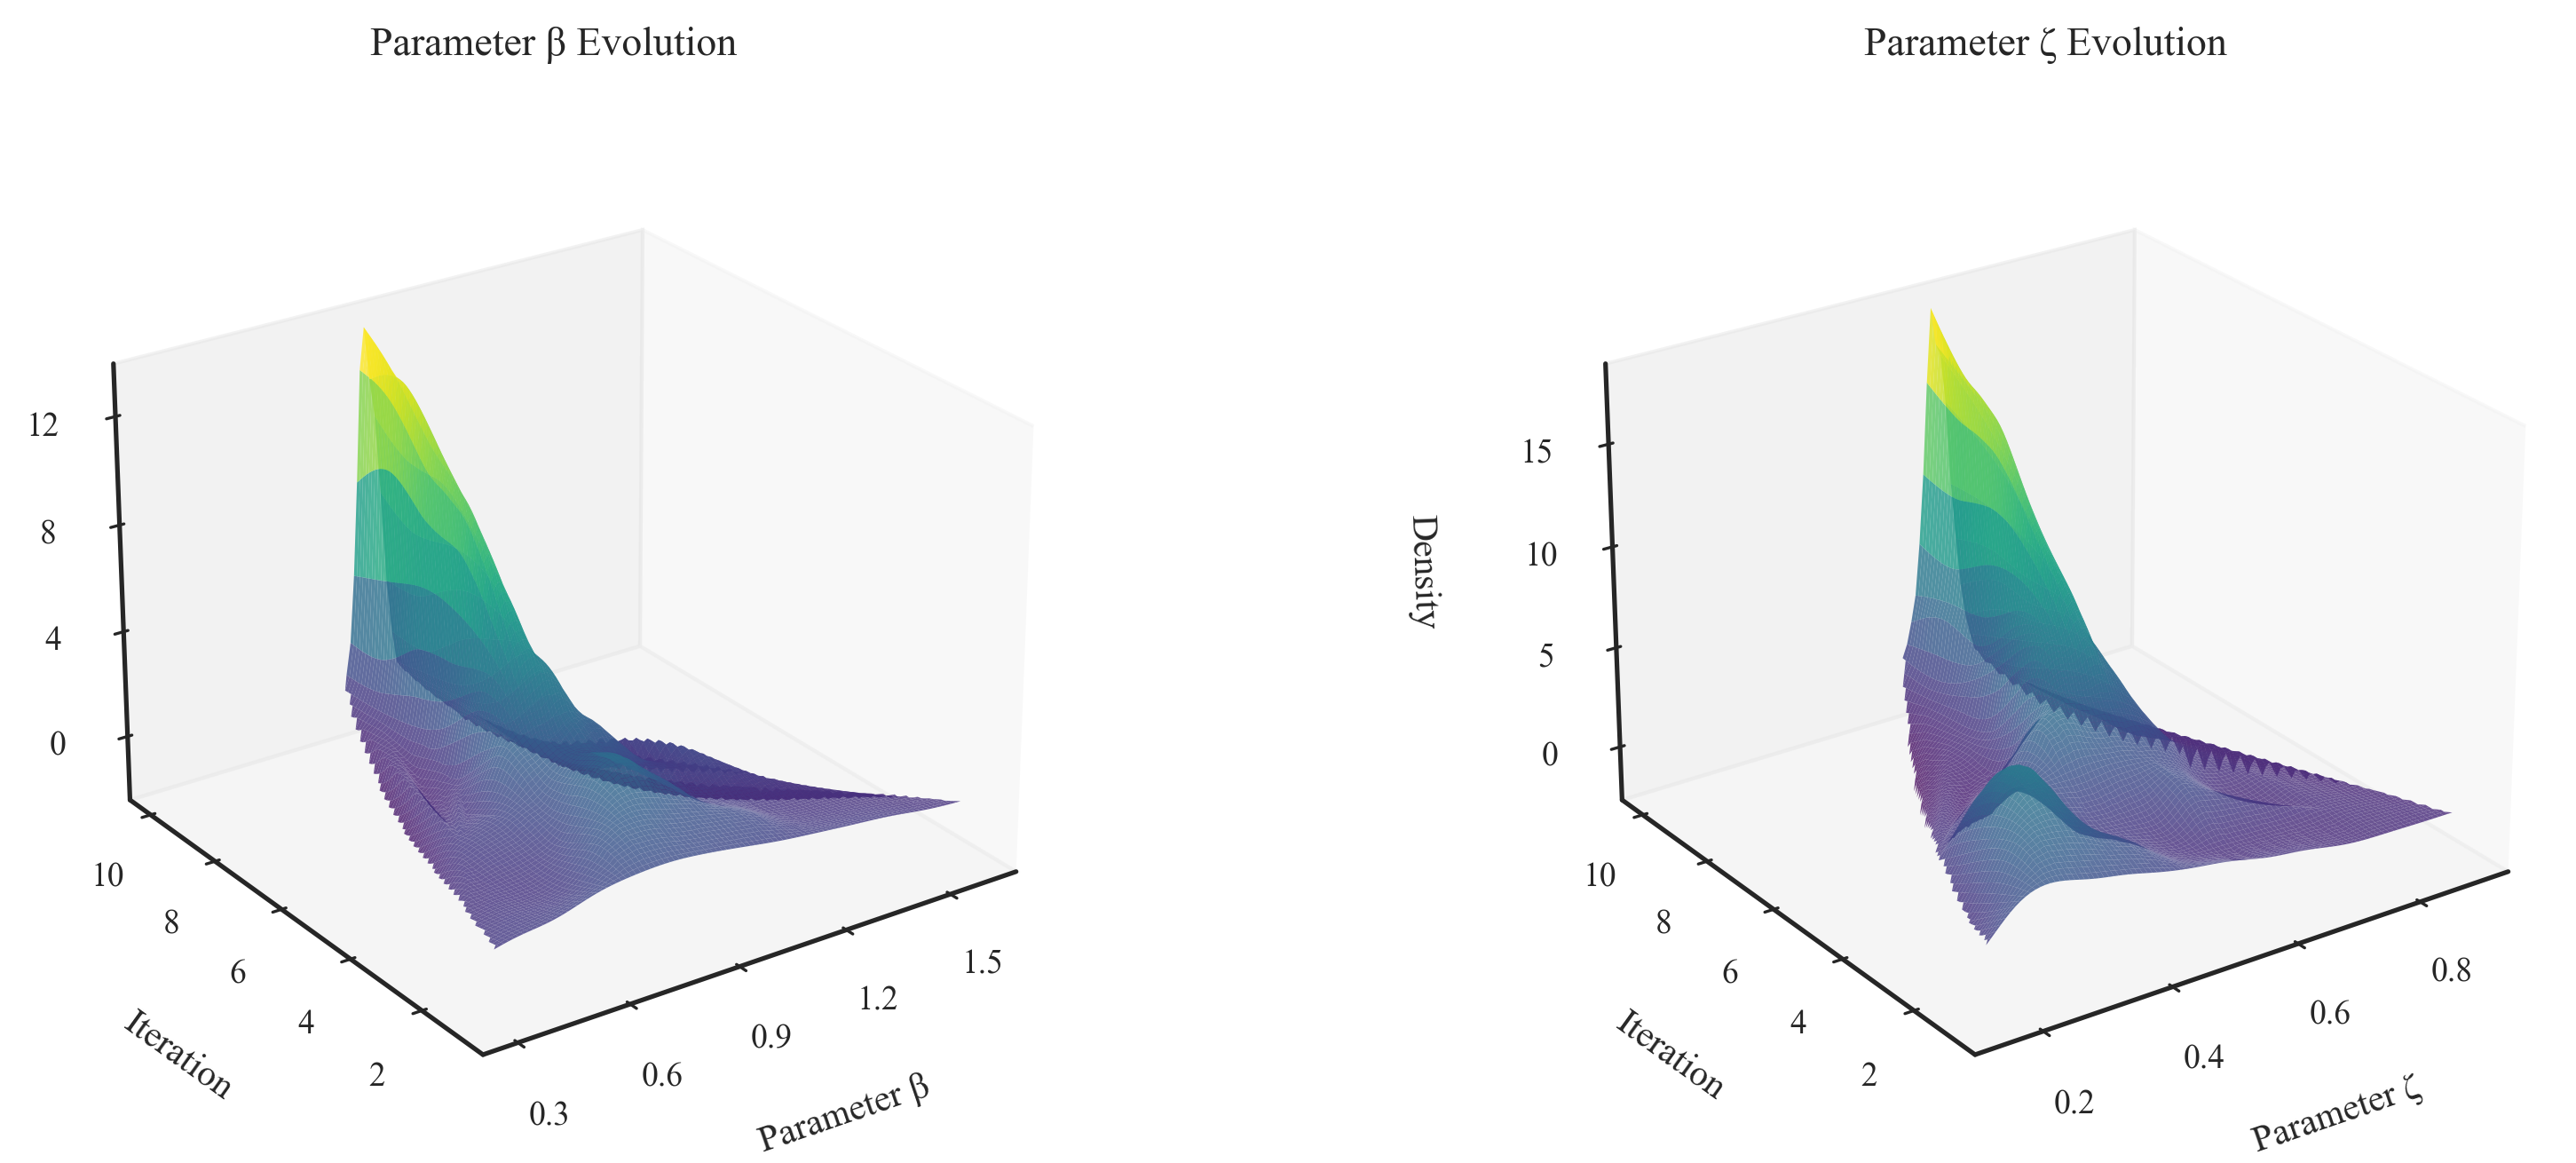

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
from mpl_toolkits.mplot3d import Axes3D

# 设置字体和样式
plt.style.use('seaborn-white')
plt.rcParams.update({
    'font.family': 'Times New Roman',
    'font.size': 10,
    'axes.titlesize': 11,
    'axes.labelsize': 10,
    'xtick.labelsize': 9,
    'ytick.labelsize': 9,
    'legend.fontsize': 9,
    'mathtext.fontset': 'stix'
})

# 创建图形
fig = plt.figure(figsize=(12, 5), dpi=300)

# 创建子图
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

for ax, param, param_key in zip([ax1, ax2], ['β', 'ζ'], ['beta', 'zeta']):
    # 准备数据
    X = []  # 参数值
    Y = []  # 迭代次数
    Z = []  # 密度值
    
    for iteration, particles in enumerate(abc_results['all_particles'], 1):
        data = [p[param_key] for p in particles]
        
        # 计算核密度估计
        density = gaussian_kde(data, bw_method='scott')  # 使用Scott方法优化带宽
        x_range = np.linspace(min(data), max(data), 100)
        z = density(x_range)
        
        X.extend(x_range)
        Y.extend([iteration] * len(x_range))
        Z.extend(z)
    
    # 转换为numpy数组并创建网格
    X = np.array(X)
    Y = np.array(Y)
    Z = np.array(Z)
    
    xi = np.linspace(X.min(), X.max(), 100)
    yi = np.linspace(Y.min(), Y.max(), 100)
    xi, yi = np.meshgrid(xi, yi)
    
    # 插值
    zi = griddata((X, Y), Z, (xi, yi), method='cubic')
    
    # 绘制3D曲面
    surf = ax.plot_surface(xi, yi, zi, 
                          cmap='viridis',
                          antialiased=True,
                          alpha=0.8,
                          rcount=100,  # 增加分辨率
                          ccount=100)
    
    # 设置标签
    ax.set_xlabel(f'Parameter {param}', labelpad=10)
    ax.set_ylabel('Iteration', labelpad=10)
    ax.set_zlabel('Density', labelpad=10)
    
    # 优化视角和布局
    ax.view_init(elev=25, azim=235)  # 调整视角使iteration在右侧
    
    # 设置标题
    ax.set_title(f'Parameter {param} Evolution', pad=20)
    
    # 优化网格线
    ax.grid(False)  # 移除网格线
    
    # 优化刻度
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))
    ax.yaxis.set_major_locator(plt.MaxNLocator(5))
    ax.zaxis.set_major_locator(plt.MaxNLocator(5))

# 调整布局
plt.tight_layout(pad=3.0)
plt.show()

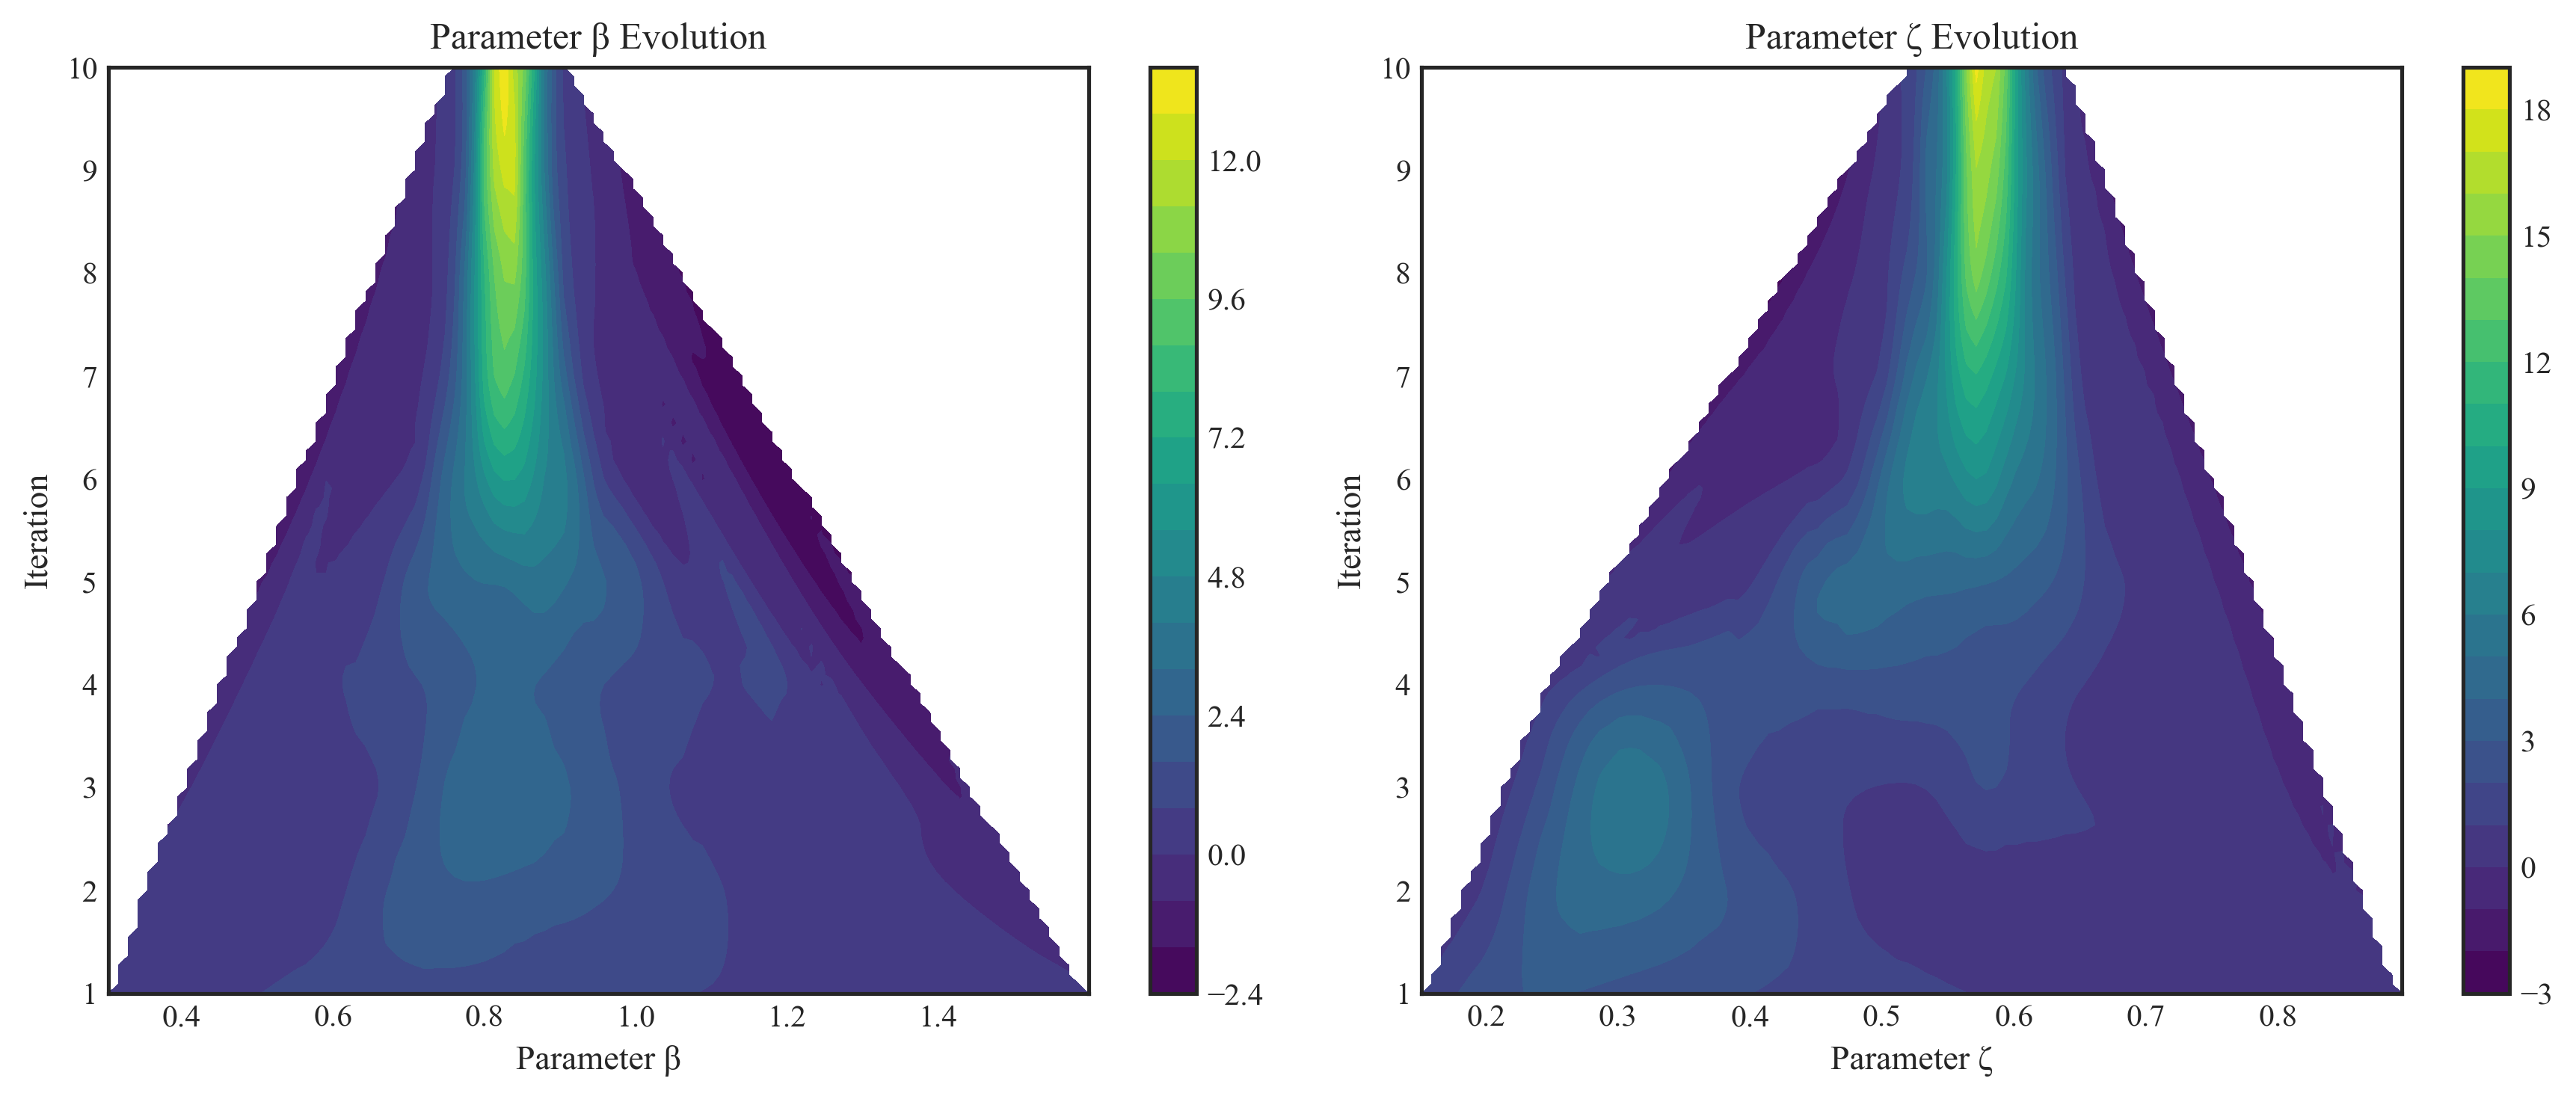

In [51]:

# 方案2：等高线图
fig = plt.figure(figsize=(12, 5), dpi=300)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

for ax, param, param_key in zip([ax1, ax2], ['β', 'ζ'], ['beta', 'zeta']):
    # 准备数据
    X = []
    Y = []
    Z = []
    
    for iteration, particles in enumerate(abc_results['all_particles'], 1):
        data = [p[param_key] for p in particles]
        density = gaussian_kde(data)
        x_range = np.linspace(min(data), max(data), 100)
        z = density(x_range)
        
        X.extend(x_range)
        Y.extend([iteration] * len(x_range))
        Z.extend(z)
    
    # 创建网格并插值
    xi = np.linspace(min(X), max(X), 100)
    yi = np.linspace(min(Y), max(Y), 100)
    xi, yi = np.meshgrid(xi, yi)
    zi = griddata((X, Y), Z, (xi, yi), method='cubic')
    
    # 绘制等高线图
    im = ax.contourf(xi, yi, zi, levels=20, cmap='viridis')
    
    # 添加颜色条
    fig.colorbar(im, ax=ax)
    
    # 设置标签
    ax.set_xlabel(f'Parameter {param}')
    ax.set_ylabel('Iteration')
    ax.set_title(f'Parameter {param} Evolution')

plt.tight_layout()
plt.show()

## 多个参数组合的模拟结果可视化

In [19]:
top_results.head()


,error,alpha,beta,theta,sigma,zeta,miu,g_m
9701,0.125296,39.620549,0.855136,0.01,33.847149,0.570337,0.937401,96.881242
11881,0.125609,75.385554,0.820619,0.01,0.010000,0.557242,0.706650,171.886218
11583,0.125671,69.690768,0.840977,0.01,0.010000,0.593041,0.640101,141.986931
9066,0.125692,8.165835,0.822067,0.01,29.050941,0.575478,0.864250,65.396158
11290,0.125695,22.954154,0.837393,0.01,37.902918,0.574180,0.133062,116.594991


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from matplotlib.gridspec import GridSpec
import joblib

# 存储所有模拟结果
all_simulations = []
successful_sims = 0
print("\nRunning multiple simulations...")

# 运行多次模拟 (例如20次)
N_SIMS = 100
for i in tqdm(range(N_SIMS)):
    try:
        # 重新加载并完全重置网络
        network = joblib.load('networks/simple_all_new.pkl')
        network.t = 0
        network.history = []
        
        # 获取不同参数组合
        best_params = top_results.iloc[i]
        params = {
            'alpha': best_params['alpha'],
            'beta': best_params['beta'],
            'theta': best_params['theta'],
            'sigma': best_params['sigma'],
            'zeta': best_params['zeta'],
            'miu': best_params['miu'],
            'g_m': best_params['g_m']
        }
        
        # 运行模拟
        history = network.simulate_steps(91, **params)
        all_simulations.append(history)
        successful_sims += 1
        
    except Exception as e:
        print(f"Error in simulation: {str(e)}")
        continue

print(f"\nSuccessfully completed {successful_sims} simulations")


C:\Users\wujlin\AppData\Local\Temp\ipykernel_10784\718933065.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')
C:\Users\wujlin\AppData\Local\Temp\ipykernel_10784\718933065.py:159: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


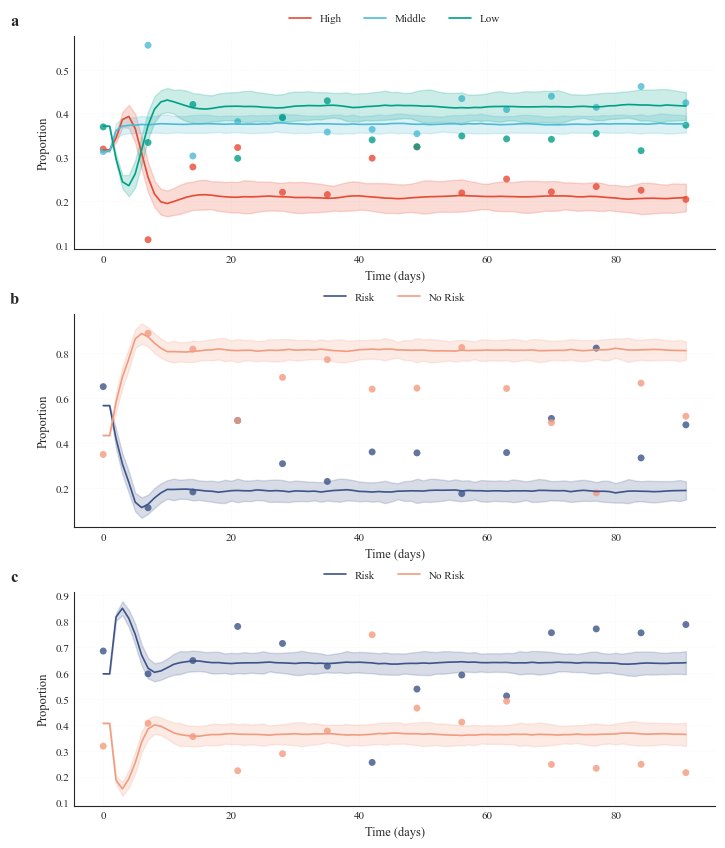

In [46]:
# 设置Times New Roman字体和Nature风格参数
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'

# Nature风格参数设置
SMALL_SIZE = 8
MEDIUM_SIZE = 9
BIGGER_SIZE = 10
PANEL_LABEL_SIZE = 12

# 设置绘图参数
plt.style.use('seaborn-white')
plt.rcParams.update({
    'font.size': SMALL_SIZE,
    'axes.titlesize': MEDIUM_SIZE,
    'axes.labelsize': MEDIUM_SIZE,
    'xtick.labelsize': SMALL_SIZE,
    'ytick.labelsize': SMALL_SIZE,
    'legend.fontsize': SMALL_SIZE,
    'figure.titlesize': BIGGER_SIZE,
    'axes.linewidth': 0.8,
    'grid.linewidth': 0.4,
    'lines.linewidth': 1.0
})

# Nature配色方案
COLOR_PALETTE = {
    'high': '#E64B35',     # 红色
    'middle': '#4DBBD5',   # 蓝色
    'low': '#00A087',      # 绿色
    'risk': '#3C5488',     # 深蓝
    'no_risk': '#F39B7F'   # 橙色
}

# 设置字体
plt.rcParams.update({
    'font.family': 'Times New Roman',
    'font.serif': ['Times New Roman'],
    'mathtext.fontset': 'stix',
    'font.size': SMALL_SIZE,
    'axes.titlesize': MEDIUM_SIZE,
    'axes.labelsize': MEDIUM_SIZE,
    'xtick.labelsize': SMALL_SIZE,
    'ytick.labelsize': SMALL_SIZE,
    'legend.fontsize': SMALL_SIZE,
    'figure.titlesize': BIGGER_SIZE
})


# 对于latex文本
plt.rcParams['text.usetex'] = False  # 如果不需要latex渲染，设为False

if successful_sims > 0:
    # 创建图表
    fig = plt.figure(figsize=(8.27, 10))  # A4宽度
    gs = GridSpec(3, 1, figure=fig, height_ratios=[1, 1, 1], hspace=0.3)

    # 确保时间步长与数据长度匹配
    time_steps = np.arange(len(all_simulations[0]))

    # 1. Ordinary People Sentiment
    ax1 = fig.add_subplot(gs[0])
    
    for sentiment, color, label in [
        ('H', COLOR_PALETTE['high'], 'High'),
        ('M', COLOR_PALETTE['middle'], 'Middle'),
        ('L', COLOR_PALETTE['low'], 'Low')
    ]:
        # 收集所有模拟中的数据
        data = np.array([[step['o_people'][sentiment] for step in sim] 
                        for sim in all_simulations])
        
        # 计算均值和标准差
        mean = np.mean(data, axis=0)
        std = np.std(data, axis=0)
        
        # 绘制均值线
        ax1.plot(time_steps, mean, color=color, label=label, lw=1.2)
        
        # 添加误差区间 (95%置信区间)
        ax1.fill_between(time_steps, 
                        mean - 1.96 * std,  # 直接使用标准差
                        mean + 1.96 * std,  # 直接使用标准差
                        color=color, alpha=0.2)
        
        # 添加经验数据点
        if empirical_data:
            emp_data = empirical_data[f'sentiment_{label.lower()}_p']
            for i in emp_data:
                ax1.scatter(i*7, emp_data[i], color=color, 
                           marker='o', s=25, alpha=0.8, edgecolors='none')

    ax1.text(-0.1, 1.05, 'a', transform=ax1.transAxes, 
             fontsize=PANEL_LABEL_SIZE, fontweight='bold')
    ax1.set_xlabel('Time (days)')
    ax1.set_ylabel('Proportion')
    ax1.legend(frameon=False, ncol=3, loc='upper center', bbox_to_anchor=(0.5, 1.15))
    ax1.grid(True, alpha=0.3, linestyle=':')
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)

    # 2 & 3. Media Risk
    titles = ['b', 'c']
    media_types = ['m_media', 'w_media']
    emp_keys = ['m_risk_p', 'w_risk_p']
    
    for idx, (media_type, emp_key) in enumerate(zip(media_types, emp_keys)):
        ax = fig.add_subplot(gs[idx + 1])
        
        # 收集风险和无风险数据
        risk_data = np.array([[step[media_type]['R'] for step in sim] 
                             for sim in all_simulations])
        no_risk_data = np.array([[step[media_type]['NR'] for step in sim] 
                                for sim in all_simulations])
        
        # 计算均值和标准差
        risk_mean = np.mean(risk_data, axis=0)
        risk_std = np.std(risk_data, axis=0)
        no_risk_mean = np.mean(no_risk_data, axis=0)
        no_risk_std = np.std(no_risk_data, axis=0)
        
        # 绘制风险线条和误差区间
        ax.plot(time_steps, risk_mean, label='Risk', 
               color=COLOR_PALETTE['risk'], lw=1.2)
        ax.fill_between(time_steps, 
                       risk_mean - 1.96 * risk_std,
                       risk_mean + 1.96 * risk_std,
                       color=COLOR_PALETTE['risk'], alpha=0.2)
        
        ax.plot(time_steps, no_risk_mean, label='No Risk', 
               color=COLOR_PALETTE['no_risk'], lw=1.2)
        ax.fill_between(time_steps, 
                       no_risk_mean - 1.96 * no_risk_std,
                       no_risk_mean + 1.96 * no_risk_std,
                       color=COLOR_PALETTE['no_risk'], alpha=0.2)
        
        # 添加经验数据点
        if empirical_data:
            emp_data = empirical_data[emp_key]
            for i in emp_data:
                ax.scatter(i*7, emp_data[i], 
                          color=COLOR_PALETTE['risk'], 
                          marker='o', s=25, alpha=0.8, edgecolors='none')
                ax.scatter(i*7, 1-emp_data[i], 
                          color=COLOR_PALETTE['no_risk'], 
                          marker='o', s=25, alpha=0.8, edgecolors='none')
        
        ax.text(-0.1, 1.05, titles[idx], transform=ax.transAxes, 
                fontsize=PANEL_LABEL_SIZE, fontweight='bold')
        ax.set_xlabel('Time (days)')
        ax.set_ylabel('Proportion')
        ax.legend(frameon=False, ncol=2, loc='upper center', bbox_to_anchor=(0.5, 1.15))
        ax.grid(True, alpha=0.3, linestyle=':')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

    plt.tight_layout()
    plt.show()
else:
    print("No successful simulations to visualize")